# MINI PROJECT DATA SCIENCE HABISKERJA.COM

## Problem Statement

Jono, a Data Scientist at Madugital, is now faced with the crucial task of helping Joni, Madugital's CRM manager. Joni has a special desire, which is to determine customers who have high potential to buy Madugital products based on activity on their website. In order to achieve this goal, Jono was given access to lead data coming from the form of customers who had accessed the Madugital website through various marketing channels. This data involves information about whether the customer has purchased the product or not, which is reflected in the column "converted."
After Jono examined the data and understood the wishes of the business team, it seems that he is facing confusion. The challenge now is how to detail the definitions of each data point in the excel table provided by the CRM team. Jono needs help to overcome his confusion. 
Can you provide guidance or solutions to help Jono achieve his desired goals?

**Goals: Joni wants to know which customers have the most potential to buy products based on activity on the website, as well as so that Madugital can contact those customers faster and take more appropriate actions.**

## Pernyataan masalah

Jono, seorang Data Scientist di Madugital, kini dihadapkan pada tugas krusial untuk membantu Joni, manajer CRM Madugital. Joni memiliki keinginan khusus, yaitu menentukan pelanggan yang memiliki potensi tinggi untuk membeli produk Madugital berdasarkan aktivitas di situs web mereka. Dalam rangka mencapai tujuan ini, Jono diberikan akses ke data leads yang berasal dari formulir pelanggan yang telah mengakses situs web Madugital melalui berbagai saluran pemasaran. Data ini melibatkan informasi tentang apakah pelanggan telah membeli produk atau tidak, yang tercermin dalam kolom "converted."
Setelah Jono memeriksa data dan memahami keinginan tim bisnis, tampaknya dia menghadapi kebingungan. Tantangannya sekarang adalah bagaimana merinci definisi dari masing-masing titik data dalam tabel excel yang diberikan oleh tim CRM. Jono membutuhkan bantuan untuk mengatasi kebingungannya. 
Bisakah Anda memberikan panduan atau solusi untuk membantu Jono mencapai tujuan yang diinginkan?

**Tujuan: Joni ingin mengetahui pelanggan mana yang memiliki potensi besar untuk membeli produk berdasarkan aktivitas di situs web, serta agar Madugital dapat menghubungi pelanggan tersebut dengan lebih cepat dan tindakan yang lebih tepat.**


# Data Preparation (Persiapan Data)

This section seeks to impute null or incorrect values in the dataset and ensure all dataset features are of the correct data type.

Bagian ini berupaya untuk memperhitungkan nilai nol atau salah dalam kumpulan data dan memastikan semua fitur kumpulan data memiliki tipe data yang benar.

In [1]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from scikitplot.metrics import plot_lift_curve

In [2]:
#Import dataset (Impor kumpulan data)
dls = pd.read_csv("lead_scoring.csv")

In [3]:
#check records and columns (Mengecek jumlah baris dan kolom)
dls.shape

(9240, 37)

In [4]:
#Sample view of the dataset (Contoh tampilan kumpulan data)
dls.sample(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7897,e75c26b2-c0dc-4c59-ae39-315a3e8bd9b2,589266,Landing Page Submission,Organic Search,No,No,1,9.0,232,3.00,...,No,Potential Lead,Select,01.High,01.High,16.0,18.0,No,No,SMS Sent
1462,2bd7dc3c-df9a-449b-b07c-5f5540a55a42,644862,Landing Page Submission,Google,No,No,0,6.0,1152,3.00,...,No,NaN,Jakarta,03.Low,01.High,12.0,18.0,No,No,SMS Sent
3197,8ce9a146-a884-42a2-9189-b7e3c5ebf53c,629418,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified
6076,98c5c956-ca51-44d4-909e-3b2d118b7522,603216,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,1256,1.00,...,No,Student of SomeSchool,Other Metro Cities,NaN,NaN,NaN,NaN,No,No,Modified
1458,91301a80-7501-45b4-b91a-1837c2547b21,644885,Landing Page Submission,Direct Traffic,No,No,1,2.0,1545,2.00,...,No,Potential Lead,Jakarta,02.Medium,01.High,15.0,20.0,No,Yes,Email Opened
1617,a053056a-a75d-4aa5-858d-0e2381837b32,643443,API,Google,No,No,1,13.0,1667,4.33,...,No,Select,Select,01.High,02.Medium,16.0,15.0,No,No,SMS Sent
8243,ca534927-9fd0-4102-b57c-91c2cbd5d58f,586948,Landing Page Submission,Direct Traffic,No,No,1,2.0,1522,2.00,...,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,SMS Sent
4151,ea0fb964-f056-42a4-8441-252b3ed4851a,620179,Landing Page Submission,Google,No,No,1,6.0,1212,3.00,...,No,Potential Lead,Bodetabek,NaN,NaN,NaN,NaN,No,Yes,SMS Sent
1845,ff31e840-8fc7-45d0-a399-59accdb1f7dc,641602,API,Google,No,No,1,3.0,481,3.00,...,No,Potential Lead,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Email Opened
6826,4105dd07-f178-4978-ad10-5d4b141be05d,597343,API,Google,No,No,1,2.0,208,2.00,...,No,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent


In [5]:
#Examine current data types and count of non-null entries by feature (Periksa tipe data saat ini dan jumlah entri bukan nol berdasarkan fitur)
dls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

In [6]:
#Count columns with fewer than 9240 observations in dls (Hitung kolom dengan kurang dari 9240 observasi di dls)
cols_w_nulls = [dls[c].isna().max() for c in dls.columns]
sum(cols_w_nulls)

17

Of the 37 features in this dataset, 17 have nulls and several more have incorrect data types.

As part of our data preparation, we review each feature one-by-one to identify correct data types and appropriate null handling.

Dari 37 fitur dalam kumpulan data ini, 17 memiliki null dan beberapa lainnya memiliki tipe data yang salah.

Sebagai bagian dari persiapan data, kami meninjau setiap fitur satu per satu untuk mengidentifikasi tipe data yang benar dan penanganan null yang tepat.

In [7]:
#Drop Prospect ID, we can use Lead Number as the unique ID for each observation (Drop Prospect ID, kita dapat menggunakan Lead Number sebagai ID unik untuk setiap observasi)
dls.drop(columns='Prospect ID', axis=1, inplace=True)

#### Null Handling: Lead Source (Penanganan Null: Sumber Utama)

* **Lead Source**: The source of the lead. Includes Google, Organic Search, Olark Chat, etc. 

Assess the distribution of the feature to determine the preferred null imputation method.

* **Sumber Prospek**: Sumber prospek. Termasuk Google, Penelusuran Organik, Obrolan Olark, dll.

Menilai distribusi fitur untuk menentukan metode imputasi nol yang disukai

<function matplotlib.pyplot.show(close=None, block=None)>

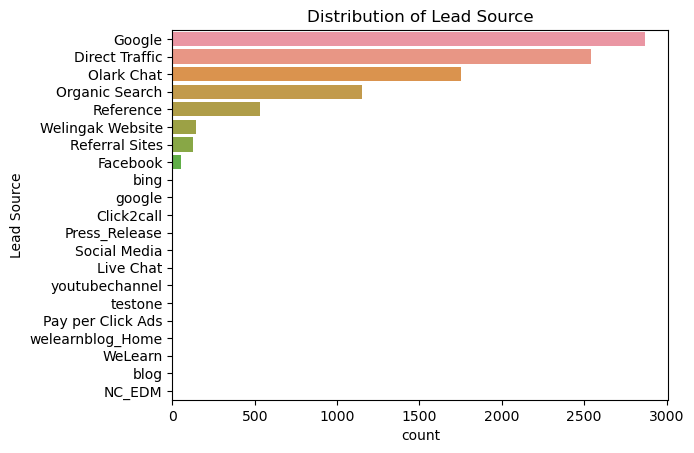

In [8]:
#Plot distribution of Lead Source (Distribusi plot Sumber Utama)
sns.countplot(y='Lead Source', data=dls, order = dls['Lead Source'].value_counts().index)
plt.title('Distribution of Lead Source')
plt.show

There is no single most common Lead Source which could be used to impute null values. As a result, imputing nulls with a new value "Unknown" would be the preferred null imputation method.

Tidak ada satu pun Sumber Prospek paling umum yang dapat digunakan untuk memperhitungkan nilai nol. Akibatnya, memasukkan null dengan nilai baru "Tidak Diketahui" akan menjadi metode imputasi nol yang lebih disukai.

In [9]:
#Impute nulls with "Unknown" (Tukarkan null dengan "Tidak Diketahui")
dls['Lead Source'] = dls['Lead Source'].fillna('Unknown')

#### Data Type Correction: Do Not Email, Do Not Call, Converted (Koreksi Tipe Data: Jangan Email, Jangan Panggil, Dikonversi)

* **Do Not Email**: An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not. 

* **Jangan Email**: Variabel indikator yang dipilih oleh pelanggan dimana mereka memilih apakah mereka tidak ingin dikirimi email tentang kursus atau tidak.

* **Do Not Call**: An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not. 

* **Jangan Menelepon**: Variabel indikator yang dipilih oleh pelanggan dimana mereka memilih apakah mereka tidak ingin dihubungi tentang kursus atau tidak.

* **Converted**: The target variable. Indicates whether a lead has been successfully converted or not.

* **Dikonversi**: Variabel target. Menunjukkan apakah prospek berhasil dikonversi atau tidak.)


These features will be easier to manipulate, interpret, and use in a model by converting them to boolean values. 

Fitur-fitur ini akan lebih mudah untuk dimanipulasi, diinterpretasikan, dan digunakan dalam model dengan mengonversinya menjadi nilai boolean.

In [10]:
#Convert Do Not Email, Do Not Call, Converted to boolean values (Konversi Jangan Email, Jangan Panggil, Dikonversi ke nilai boolean)
for c in ['Do Not Email', 'Do Not Call', 'Converted']:
    dls[c] = dls[c].replace('Yes',1)
    dls[c] = dls[c].replace('No',0)
    dls[c] = dls[c].astype(bool)

#### Null Handling: TotalVisits & Page Views Per Visit (Penanganan Null: Total Kunjungan & Tampilan Halaman Per Kunjungan)

* **TotalVisit**: The total number of visits made by the customer on the website. 

* **Total Pengunjung**: Jumlah total kunjungan yang dilakukan pelanggan di situs web.

* **Page Views Per Visit**: The total number of visits made by the customer on the website.

* **Tampilan Halaman Per Kunjungan**: Jumlah total kunjungan yang dilakukan oleh pelanggan di situs web.

We assess the distribution of each of these features to determine the best imputation method.

Kami menilai distribusi masing-masing fitur ini untuk menentukan metode imputasi terbaik.

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64 



Text(0.5, 1.0, 'Distribution of Total Visits to Website')

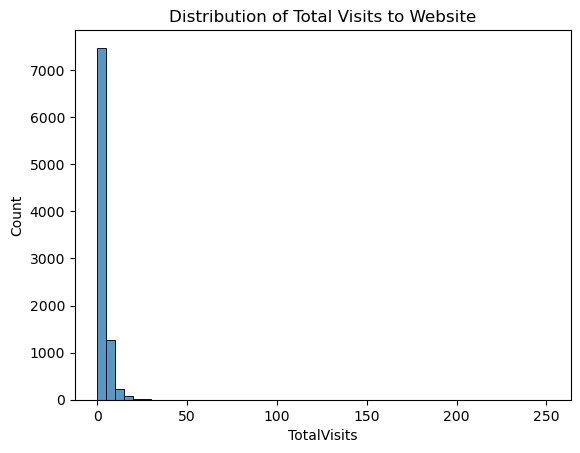

In [11]:
#Examine distribution of Total Visits (Periksa distribusi Total Kunjungan)
print(dls['TotalVisits'].describe(),"\n")

sns.histplot(x='TotalVisits', data=dls, bins=50)
plt.title("Distribution of Total Visits to Website")

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64 



Text(0.5, 1.0, 'Distribution of Page Views Per Visit')

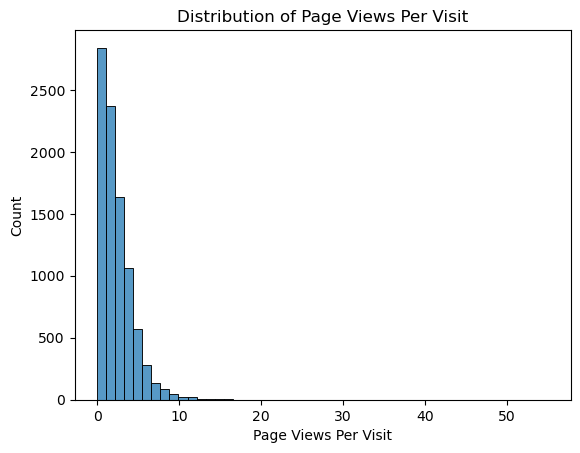

In [12]:
#Examine distribution of Page Views per Visit (Periksa distribusi Tampilan Halaman per Kunjungan)
print(dls['Page Views Per Visit'].describe(),"\n")

sns.histplot(x='Page Views Per Visit', data=dls, bins=50)
plt.title("Distribution of Page Views Per Visit")

The distributions for both these features is severely left-skewed, suggesting that median imputation would be best suited to handle nulls.

Distribusi untuk kedua fitur ini sangat condong ke kiri, sehingga menunjukkan bahwa imputasi median paling cocok untuk menangani nilai nol.

In addition, TotalVisits should be an integer, not a float. 

Selain itu, Total Kunjungan harus berupa bilangan bulat, bukan bilangan mengambang.

In [13]:
#Impute nulls in both features with median value of the feature (Hitung null di kedua fitur dengan nilai median fitur tersebut)
dls['TotalVisits'] = dls['TotalVisits'].fillna(dls['TotalVisits'].median())
dls['Page Views Per Visit'] = dls['Page Views Per Visit'].fillna(dls['Page Views Per Visit'].median())

#Convert data type to int
dls['TotalVisits'] = dls['TotalVisits'].astype('int')

#### Null Handling: Last Activity (Penanganan Null: Aktivitas Terakhir)

* **Last Activity**: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

* **Aktivitas Terakhir**: Aktivitas terakhir yang dilakukan oleh pelanggan. Termasuk Email Dibuka, Percakapan Obrolan Olark, dll.

Assess the distribution of the feature to determine best null imputation method. 

Menilai distribusi fitur untuk menentukan metode imputasi nol terbaik.

Text(0.5, 1.0, 'Distribution of Last Activity')

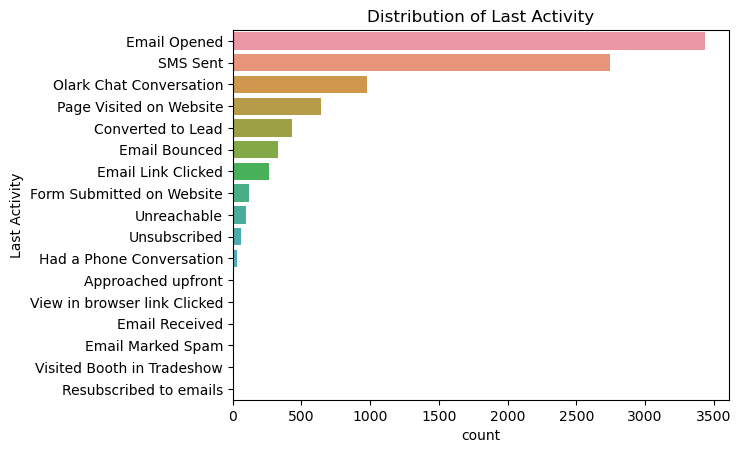

In [14]:
#Plot distribution of leads by Last Activity (Plot distribusi prospek berdasarkan Aktivitas Terakhir)
sns.countplot(y='Last Activity', data=dls, order = dls['Last Activity'].value_counts().index)
plt.title('Distribution of Last Activity')

No category for Last Activity stands out as the likely value for nulls in this feature. As a result, imputing nulls with a new category called "Null" is best.

Tidak ada kategori untuk Aktivitas Terakhir yang menonjol sebagai kemungkinan nilai nol dalam fitur ini. Oleh karena itu, memasukkan null dengan kategori baru yang disebut "Null" adalah yang terbaik.

In [15]:
#Impute nulls with new category (Tukarkan null dengan kategori baru)
dls['Last Activity'] = dls['Last Activity'].fillna('Null')

#### Null Handling: Country (Penanganan Null: Negara)

* **Country**: The country of the customer. 

* **Negara**: Negara pelanggan.

Assess the distribution of the feature to identify the appropriate null handling method. 

Menilai distribusi fitur untuk mengidentifikasi metode penanganan null yang sesuai.

Text(0.5, 1.0, 'Distribution of Leads by Country')

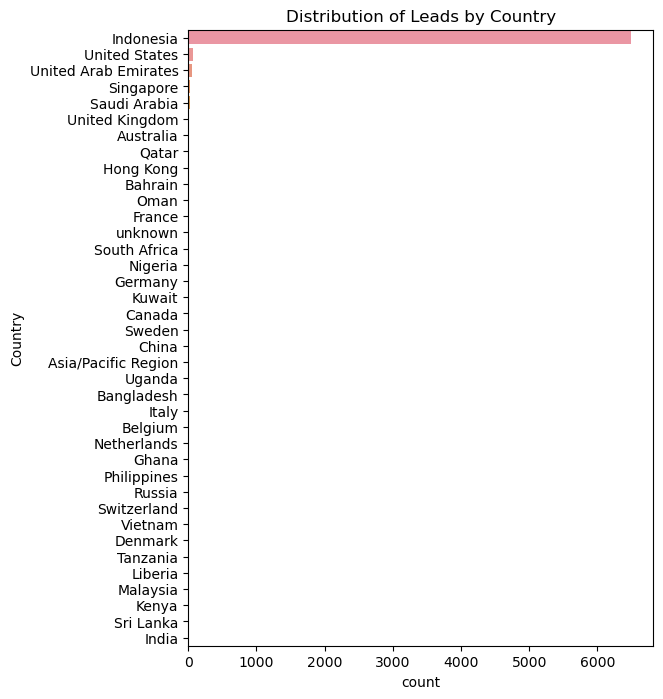

In [16]:
#Plot distribution of Leads by Country (Distribusi plot Prospek berdasarkan Negara)
plt.figure(figsize=(6,8))
sns.countplot(y='Country', data=dls, order = dls['Country'].value_counts().index)
plt.title('Distribution of Leads by Country')

In [17]:
#Print the percentage of values that are null in the Country feature (Cetak persentase nilai yang null di fitur Negara)
print(round(dls['Country'].isna().sum()*100/len(dls['Country']),2),'% of values in Country are null.')

26.63 % of values in Country are null.


Maybe we can deduce the country a lead is located in from the city they have indicated they are located in. 

Mungkin kita dapat menyimpulkan negara tempat prospek berada dari kota tempat mereka berada.

Text(0.5, 1.0, 'Distribution of Leads by City where Country is null')

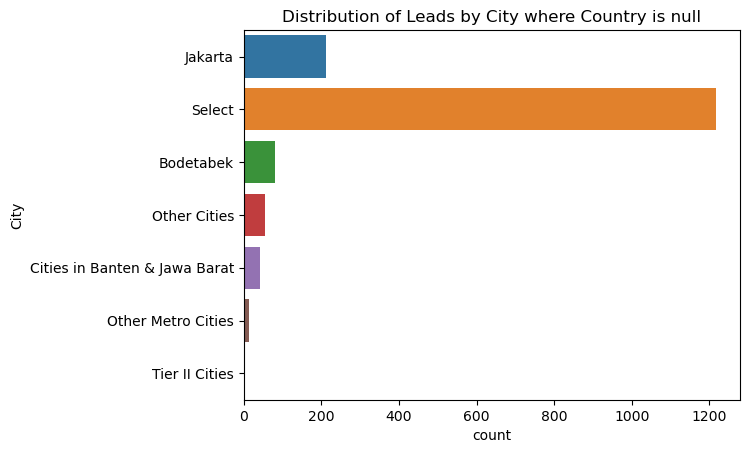

In [18]:
#Plot distribution of City where Country is null (Distribusi plot Kota dengan Negara adalah nol)
sns.countplot(y='City', data=dls[dls['Country'].isna()], order = dls['City'].value_counts().index)
plt.title('Distribution of Leads by City where Country is null')

For cities that are located in Indonesia, we can impute null values in Country as "India". Otherwise, we should impute nulls in Country as "Unknown" 

Untuk kota-kota yang berlokasi di Indonesia, kita dapat menganggap nilai nol di Negara sebagai "Indonesia". Jika tidak, kita harus menganggap nol di Negara sebagai "Tidak Diketahui"

In [19]:
#Impute nulls in Country based on Country (Hitung nol di Negara berdasarkan Negara)
indonesia_cities = ['Jakarta','Bodetabek','Cities in Banten & Jawa Barat']

for i in dls[dls['Country'].isnull()].index:
    if dls.loc[i,'City'] in indonesia_cities:
        dls.loc[i,'Country'] = 'Indonesia'
    else:
        dls.loc[i,'Country'] = 'Unknown'

#### Data Type Correction: Search, Magazine, Newspaper Article, Madugital Telegram, Newspaper, Digital Advertisement

* **Search**: Indicating whether the customer had seen the ad in any of the listed items (i.e. during a web search).
* **Magazine**: Indicating whether the customer had seen the ad in any of the listed items (i.e. in a magazine).
* **Newspaper Article**: Indicating whether the customer had seen the ad in any of the listed items (i.e. in a newspaper article).
* **Madugital Telegram**: Indicating whether the customer had seen the ad in any of the listed items (i.e. in a Madugital Telegram).
* **Newspaper**: Indicating whether the customer had seen the ad in any of the listed items (i.e. in a newspaper).
* **Digital Advertisement**: Indicating whether the customer had seen the ad in any of the listed items (i.e. in a digital ad).

These features will be easier to manipulate, interpret, and use in a model by converting them to boolean values.

#### Koreksi Tipe Data: Pencarian, Majalah, Artikel Surat Kabar, Telegram Madugital, Surat Kabar, Iklan Digital

* **Penelusuran**: Menunjukkan apakah pelanggan telah melihat iklan di salah satu item yang tercantum (yaitu selama penelusuran web).
* **Majalah**: Menunjukkan apakah pelanggan pernah melihat iklan di salah satu item yang terdaftar (yaitu di majalah).
* **Artikel Surat Kabar**: Menunjukkan apakah pelanggan pernah melihat iklan di salah satu item yang terdaftar (yaitu di artikel surat kabar).
* **Telegram Madugital**: Menunjukkan apakah pelanggan telah melihat iklan di salah satu item yang terdaftar (yaitu di Telegram Madugital).
* **Koran**: Menunjukkan apakah pelanggan pernah melihat iklan di salah satu item yang terdaftar (yaitu di surat kabar).
* **Iklan Digital**: Menunjukkan apakah pelanggan telah melihat iklan di salah satu item yang terdaftar (yaitu dalam iklan digital).

Fitur-fitur ini akan lebih mudah untuk dimanipulasi, diinterpretasikan, dan digunakan dalam model dengan mengonversinya menjadi nilai boolean.

In [20]:
#Convert yes/no field to boolean (Ubah bidang ya/tidak menjadi boolean)
for c in ['Search', 'Magazine', 'Newspaper Article', 'Madugital Telegram', 'Newspaper', 'Digital Advertisement']:
    dls[c] = dls[c].replace('Yes',1)
    dls[c] = dls[c].replace('No',0)
    dls[c] = dls[c].astype(bool)

#### Data Type Correction: Through Recommendations, Receive More Updates About Our Products

* **Through Recommendations**: Indicates whether the customer came in through recommendations.
* **Receive More Updates About Our Products**: Indicates whether the customer chose to receive more updates about the courses.

These features will be easier to manipulate, interpret, and use in a model by converting them to boolean values.

#### Koreksi Tipe Data: Melalui Rekomendasi, Dapatkan Lebih Banyak Pembaruan Tentang Produk Kami

* **Melalui Rekomendasi**: Menunjukkan apakah pelanggan datang melalui rekomendasi.
* **Terima Lebih Banyak Pembaruan Tentang Produk Kami**: Menunjukkan apakah pelanggan memilih untuk menerima lebih banyak pembaruan tentang kursus.

Fitur-fitur ini akan lebih mudah untuk dimanipulasi, diinterpretasikan, dan digunakan dalam model dengan mengonversinya menjadi nilai boolean.

In [21]:
#Convert yes/no field to boolean (Ubah bidang ya/tidak menjadi boolean)
for c in ['Through Recommendations', 'Receive More Updates About Our Products']:
    dls[c] = dls[c].replace('Yes',1)
    dls[c] = dls[c].replace('No',0)
    dls[c] = dls[c].astype(bool)

#### Null Handling: Specialization, How did you hear about Madugital

* **Specialization**: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
* **How did you hear about Madugital**: The source from which the customer heard about Madugital.
* **What is your current occupation**: Indicates whether the customer is a student, umemployed or employed.
* **What matters most to you in choosing a Product**: An option selected by the customer indicating what is their main motto behind doing this Product.

Assess the distribution of these features to determine best null imputation method.

#### Penanganan Null: Spesialisasi, Bagaimana Anda mendengar tentang Madugital

* **Spesialisasi**: Domain industri tempat pelanggan bekerja sebelumnya. Termasuk level 'Pilih Spesialisasi' yang berarti pelanggan belum memilih opsi ini saat mengisi formulir.
* **Bagaimana Anda mendengar tentang Madugital**: Sumber dari mana pelanggan mendengar tentang Madugital.
* **Apa pekerjaan Anda saat ini**: Menunjukkan apakah pelanggan adalah pelajar, belum bekerja, atau sudah bekerja.
* **Yang paling penting bagi Anda dalam memilih Produk**: Opsi yang dipilih oleh pelanggan yang menunjukkan apa moto utama mereka di balik pembuatan Produk ini.

Menilai distribusi fitur-fitur ini untuk menentukan metode imputasi nol terbaik.

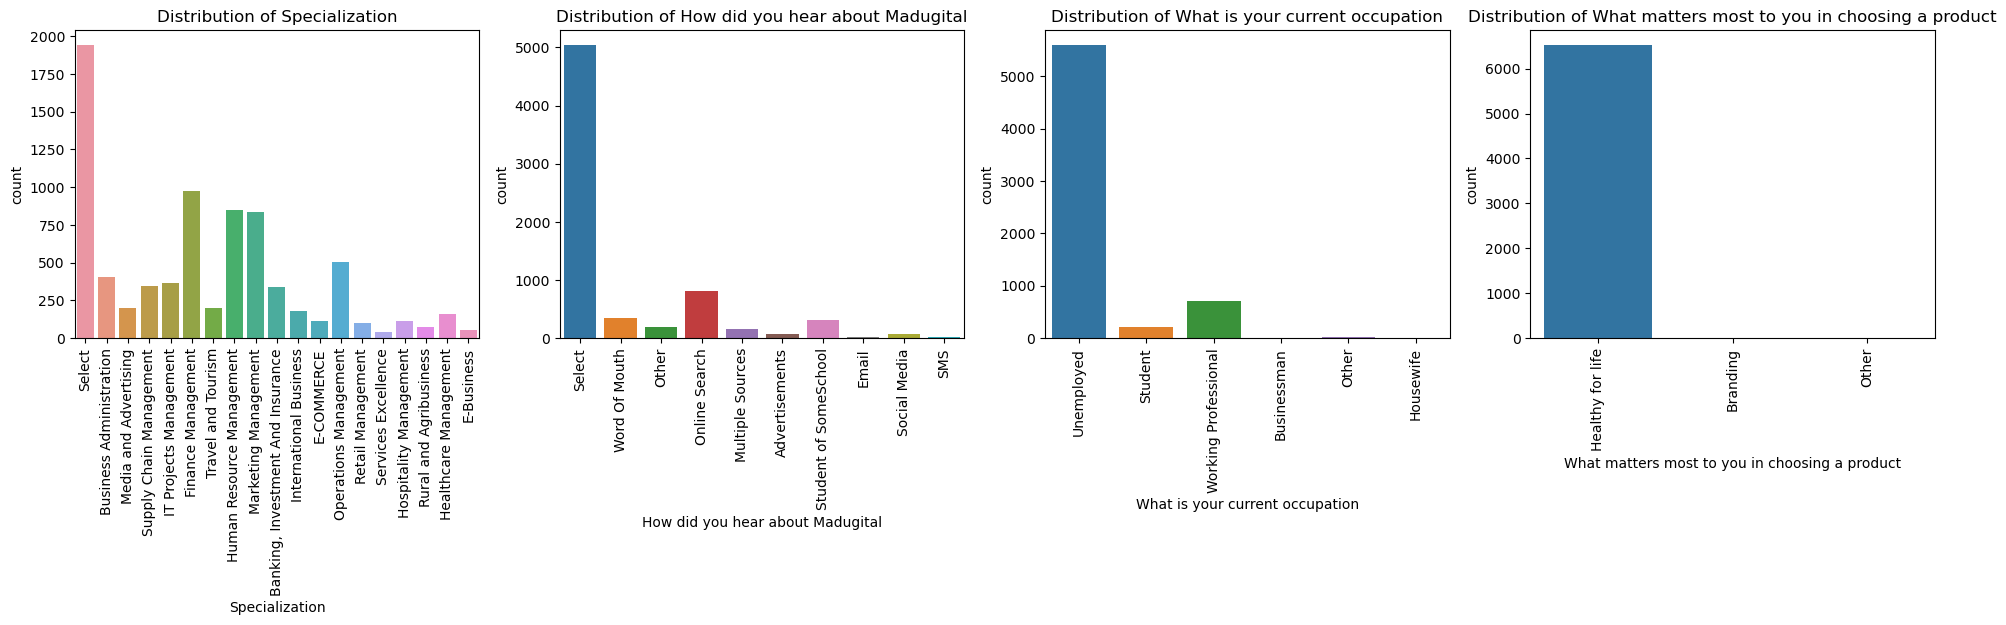

In [22]:
#Examine distribution dropdown fields (Periksa bidang dropdown distribusi)
dropdown_fields = ['Specialization','How did you hear about Madugital','What is your current occupation','What matters most to you in choosing a product']

fig, axes = plt.subplots(nrows=1, ncols=len(dropdown_fields), figsize=(24, 4))

for i in range(len(dropdown_fields)):
    sns.countplot(x=dropdown_fields[i], data=dls, ax=axes[i])
    plt.sca(axes[i])
    plt.title("Distribution of " + dropdown_fields[i])
    plt.xticks(rotation=90)

It appears that a large portion of values are "Select", which is equivalent to a null. We can replace these values with nulls.

Tampaknya sebagian besar nilainya adalah "Pilih", yang setara dengan nol. Kita dapat mengganti nilai-nilai ini dengan null.

Since there is no single value for either of these features with which nulls can be imputed, we can impute nulls as "Unknown". We can also check what percentage of values in each feature have nulls.

Karena tidak ada nilai tunggal untuk salah satu fitur ini yang dapat digunakan untuk memasukkan nilai null, kita dapat menganggap nilai null sebagai "Tidak Diketahui". Kami juga dapat memeriksa berapa persentase nilai di setiap fitur yang memiliki nol.

In [23]:
#Impute "Select" with null & print percentage of values in each feature with nulls (Impute "Pilih" dengan null & cetak persentase nilai di setiap fitur dengan null)
for c in dropdown_fields:
    dls[c].replace('Select',np.NaN, inplace=True)
    print(round(dls[c].isna().sum()*100/len(dls[c]),2),'% of values in',c,'are null.')

36.58 % of values in Specialization are null.
78.46 % of values in How did you hear about Madugital are null.
29.11 % of values in What is your current occupation are null.
29.32 % of values in What matters most to you in choosing a product are null.


In [24]:
#Impute nulls with "Unknown" (Tukarkan null dengan "Tidak Diketahui")
for c in dropdown_fields:
    dls[c].fillna('Unknown', inplace=True)

#### Data Type Correction: Update me on Supply Chain Content, Get updates on DM Content

* **Update me on Supply Chain Content**: Indicates whether the customer wants updates on the Supply Chain Content.
* **Get updates on DM Content**: Indicates whether the customer wants updates on the DM Content.

These features will be easier to manipulate, interpret, and use in a model by converting them to boolean values.

#### Koreksi Tipe Data: Perbarui saya pada Konten Rantai Pasokan, Dapatkan pembaruan pada Konten DM
* **Perbarui saya pada Konten Rantai Pasokan**: Menunjukkan apakah pelanggan menginginkan pembaruan pada Konten Rantai Pasokan.
* **Dapatkan pembaruan pada Konten DM**: Menunjukkan apakah pelanggan menginginkan pembaruan pada Konten DM.

Fitur-fitur ini akan lebih mudah untuk dimanipulasi, diinterpretasikan, dan digunakan dalam model dengan mengonversinya menjadi nilai boolean.

In [25]:
#Convert yes/no field to boolean (Ubah bidang ya/tidak menjadi boolean)
for c in ['Update me on Supply Chain Content', 'Get updates on DM Content']:
    dls[c] = dls[c].replace('Yes',1)
    dls[c] = dls[c].replace('No',0)
    dls[c] = dls[c].astype(bool)

#### Drop Feature: Tags

* **Tags**: Tags assigned to customers indicating the current status of the lead.

Since Tags is determined by the progress of a lead through the marketing funnel, is it likely endogenous to the conversion status of the lead. As a result, this feature should be dropped.

#### Fitur Jatuhkan: Tag

* **Tag**: Tag yang diberikan kepada pelanggan yang menunjukkan status prospek saat ini.

Karena Tag ditentukan oleh kemajuan prospek melalui saluran pemasaran, apakah tag tersebut kemungkinan bersifat endogen terhadap status konversi prospek. Akibatnya, fitur ini harus dihilangkan.

In [26]:
#Drop Tags feature (Fitur Jatuhkan Tag)
dls.drop(columns='Tags', axis=1, inplace=True)

#### Drop Feature: Lead Quality

* **Lead Quality**: Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.

Since Lead Quality is the measure we are looking to replace with the Lead Score, we should not include in our model.

#### Fitur Drop: Kualitas Timbal

* **Kualitas Prospek**: Menunjukkan kualitas prospek berdasarkan data dan intuisi karyawan yang ditugaskan untuk memimpin.

Karena Kualitas Prospek adalah ukuran yang ingin kami gantikan dengan Skor Prospek, sebaiknya kami tidak memasukkannya ke dalam model kami.

In [27]:
#Drop Lead Quality feature (Jatuhkan fitur Kualitas Timbal)
dls.drop(columns='Lead Quality', axis=1, inplace=True)

#### Null Handling: Lead Profile

* **Lead Profile**: A lead level assigned to each customer based on their profile.

Assess the distribution of this feature to determine best null imputation method.

#### Penanganan Null: Profil Prospek

* **Profil Prospek**: Tingkat prospek yang ditetapkan untuk setiap pelanggan berdasarkan profil mereka.

Nilai distribusi fitur ini untuk menentukan metode imputasi nol terbaik.

Text(0.5, 1.0, 'Distribution of Leads by Lead Profile')

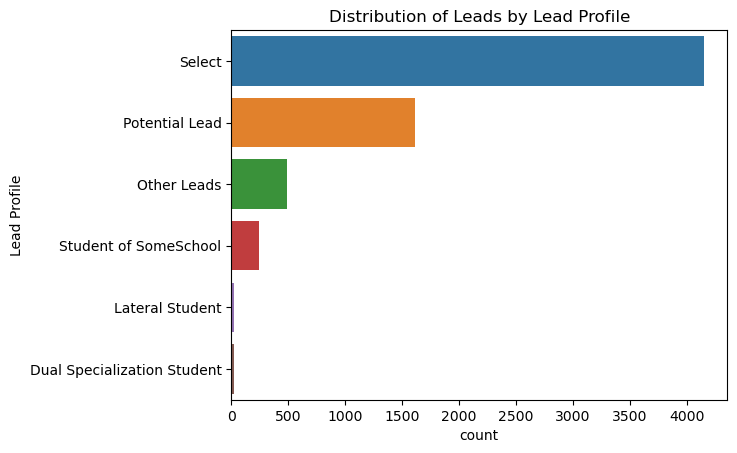

In [28]:
#Plot distribution of Lead Profile (Distribusi plot Profil Prospek)
sns.countplot(y='Lead Profile', data=dls, order = dls['Lead Profile'].value_counts().index)
plt.title('Distribution of Leads by Lead Profile')

A large portion of values are "Select", which is equivalent to a null. There is no single lead profile that stands out as a clear value for null imputation. As a result, nulls should be imputed with the value "Unknown".

Sebagian besar nilainya adalah "Pilih", yang setara dengan nol. Tidak ada satu pun profil prospek yang menonjol sebagai nilai yang jelas untuk imputasi nol. Akibatnya, null harus dikaitkan dengan nilai "Tidak Diketahui".

In [29]:
#Impute "Select" value with null (Masukkan nilai "Pilih" dengan nol)
dls['Lead Profile'].replace('Select', np.NaN, inplace=True)

In [30]:
#Impute nulls with "Unknown" (Tukarkan null dengan "Tidak Diketahui")
dls['Lead Profile'].fillna('Unknown', inplace=True)

#### Null Handling: City

* **City**: The city of the customer.

Assess the distribution of the feature to determine best null imputation method.

#### Penanganan Null: Kota

* **Kota**: Kota pelanggan.

Menilai distribusi fitur untuk menentukan metode imputasi nol terbaik.

Text(0.5, 1.0, 'Distribution of City')

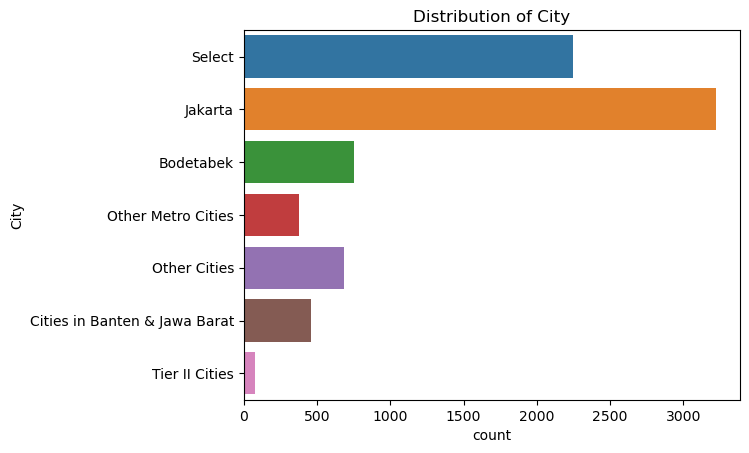

In [31]:
#Examine distribution of City (Periksa distribusi Kota)
sns.countplot(y='City', data=dls)
plt.title('Distribution of City')

Here again, a large portion of values are "Select", which is equivalent to a null. There is no single city that stands out as a clear value for null imputation. As a result, nulls should be imputed with the value "Unknown".

Sekali lagi, sebagian besar nilainya adalah "Pilih", yang setara dengan nol. Tidak ada satu kota pun yang menonjol dengan nilai yang jelas untuk imputasi nol. Akibatnya, null harus dikaitkan dengan nilai "Tidak Diketahui".

In [32]:
#Impute "Select" value with null (Masukkan nilai "Pilih" dengan nol)
dls['City'].replace('Select', np.NaN, inplace=True)

In [33]:
#Impute nulls with "Unknown" (Tukarkan null dengan "Tidak Diketahui")
dls['City'].fillna('Unknown', inplace=True)

#### Data Type Correction: I agree to pay the amount through cheque, A free copy of Mastering The Interview

* **I agree to pay the amount through cheque**: Indicates whether the customer has agreed to pay the amount through cheque or not.
* **A free copy of Mastering The Interview**: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

These features will be easier to manipulate, interpret, and use in a model by converting them to boolean values.

#### Koreksi Tipe Data: Saya setuju untuk membayar jumlah tersebut melalui cek, Salinan gratis Mastering The Interview

* **Saya setuju untuk membayar jumlah tersebut melalui cek**: Menunjukkan apakah pelanggan telah setuju untuk membayar jumlah tersebut melalui cek atau tidak.
* **Salinan gratis Mastering The Interview**: Menunjukkan apakah pelanggan menginginkan salinan gratis 'Mastering the Interview' atau tidak.

Fitur-fitur ini akan lebih mudah untuk dimanipulasi, diinterpretasikan, dan digunakan dalam model dengan mengonversinya menjadi nilai boolean.

In [34]:
#Convert remaining yes/no fields to boolean values (Ubah kolom ya/tidak yang tersisa menjadi nilai boolean)
for c in ['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
    dls[c] = dls[c].replace('Yes',1)
    dls[c] = dls[c].replace('No',0)
    dls[c] = dls[c].astype(bool)

#### Data Type Correction: Object to Category

Categorical variables with be more easily interpreted by our model if they recorded as such.

#### Koreksi Tipe Data: Objek ke Kategori

Variabel kategori akan lebih mudah diinterpretasikan oleh model kita jika dicatat seperti itu.

In [35]:
#Convert string type fields to category type (Ubah bidang tipe string menjadi tipe kategori)
for c in dls.columns:
    if dls[c].dtype=='object': dls[c] = dls[c].astype('category')

Finally, we can review the dataset to ensure no features contain nulls and all features are of the correct data type.

Terakhir, kami dapat meninjau kumpulan data untuk memastikan tidak ada fitur yang berisi null dan semua fitur memiliki tipe data yang benar.

#### Asymmetrique Index & Scores

* **Asymmetrique Activity Index**: An index and score assigned to each customer based on their activity and their profile.
* **Asymmetrique Profile Index**: An index and score assigned to each customer based on their activity and their profile.
* **Asymmetrique Activity Score**: An index and score assigned to each customer based on their activity and their profile.
* **Asymmetrique Profile Score**: An index and score assigned to each customer based on their activity and their profile.

Assess the distribution of each feature to determine the most appropriate null imputation method.

#### Indeks & Skor Asimetris

* **Indeks Aktivitas Asimetris**: Indeks dan skor yang ditetapkan untuk setiap pelanggan berdasarkan aktivitas dan profil mereka.
* **Indeks Profil Asimetris**: Indeks dan skor yang ditetapkan untuk setiap pelanggan berdasarkan aktivitas dan profil mereka.
* **Skor Aktivitas Asimetris**: Indeks dan skor yang ditetapkan untuk setiap pelanggan berdasarkan aktivitas dan profil mereka.
* **Skor Profil Asimetris**: Indeks dan skor yang ditetapkan untuk setiap pelanggan berdasarkan aktivitas dan profil mereka.

Menilai distribusi setiap fitur untuk menentukan metode imputasi nol yang paling tepat.

In [36]:
#Print descriptive statistics of score features (Cetak statistik deskriptif fitur skor) 
stats_AS = pd.DataFrame(
    {'Asymmetrique Activity Score':dls['Asymmetrique Activity Score'].describe(),
    'Asymmetrique Profile Score':dls['Asymmetrique Profile Score'].describe()})
stats_AS

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


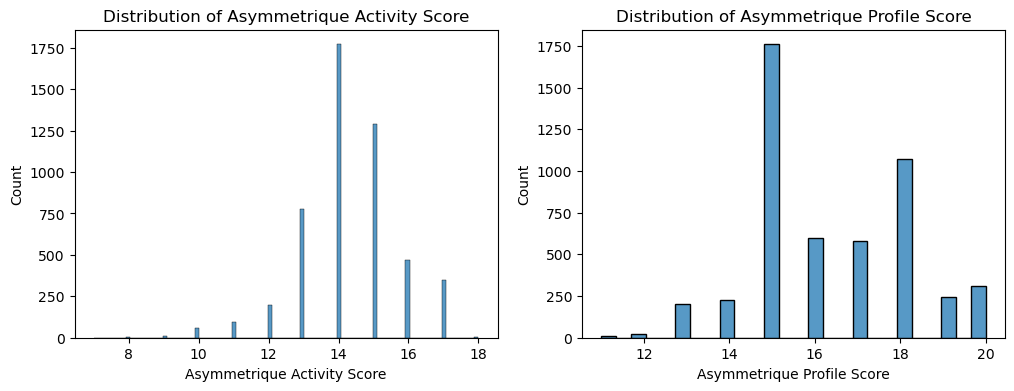

In [37]:
#Plot distribution of Asymmetrique Activity Score & Asymmetrique Profile Score (Distribusi Plot Skor Aktivitas Asimetris & Skor Profil Asimetris)
score_fields = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

fig, axes = plt.subplots(nrows=1, ncols=len(score_fields), figsize=(12, 4))

for i in range(len(score_fields)):
    sns.histplot(x=score_fields[i], data=dls, ax=axes[i])       
    plt.sca(axes[i])
    plt.title("Distribution of " + score_fields[i])

Both distributions are slight left-skewed. As a result, median imputation may be more appropriate than mean imputation.

Kedua distribusi tersebut sedikit condong ke kiri. Akibatnya, imputasi median mungkin lebih tepat dibandingkan imputasi mean.

In [38]:
#Impute nulls with median (Hitung nol dengan median)
for f in score_fields:
    dls[f].fillna(dls[f].median(), inplace=True)

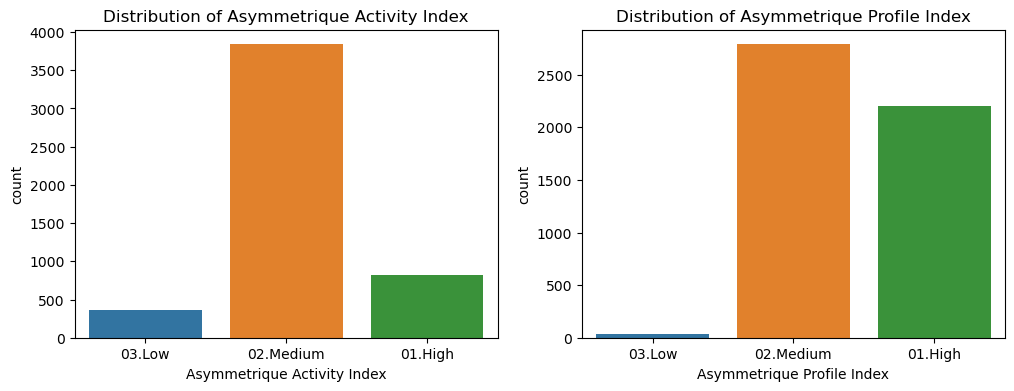

In [39]:
#Plot distribution of Asymmetrique Activity Index & Asymmetrique Profile Index (Plot Distribusi Indeks Aktivitas Asimetris & Indeks Profil Asimetris)
index_fields = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

fig, axes = plt.subplots(nrows=1, ncols=len(index_fields), figsize=(12, 4))

for i in range(len(index_fields)):
    sns.countplot(x=index_fields[i], data=dls, ax=axes[i], order=['03.Low','02.Medium','01.High'])       
    plt.sca(axes[i])
    plt.title("Distribution of " + index_fields[i])

It appears that the index features may simply be bucketed according to the Asymmetrique Score, in which case both these index features are redundant. We can confirm this by observing the mean Asymmetrique Score by Asymetrique Index.

Tampaknya fitur indeks dapat dikelompokkan berdasarkan Skor Asimetris, sehingga kedua fitur indeks ini mubazir. Hal ini dapat dipastikan dengan mengamati rata-rata Skor Asimetris dengan Indeks Asimetrik.

In [40]:
#Group by Asymmetrique Activity Index (Kelompokkan berdasarkan Indeks Aktivitas Asimetris)
grouped_by_activity_index = dls.groupby('Asymmetrique Activity Index').agg({'Asymmetrique Activity Score':'mean'})
grouped_by_activity_index

,Asymmetrique Activity Score
Asymmetrique Activity Index,
01.High,16.437272
02.Medium,14.134931
03.Low,11.290055


In [41]:
#Group by Asymmetrique Profile  (Kelompokkan berdasarkan Indeks Profil Asimetris)
grouped_by_profile_index = dls.groupby('Asymmetrique Profile Index').agg({'Asymmetrique Profile Score':'mean'})
grouped_by_profile_index

,Asymmetrique Profile Score
Asymmetrique Profile Index,
01.High,18.128007
02.Medium,14.987446
03.Low,11.709677


As can be seen above, Asymmetrique Activity/Profile Index values appear to simply bucket Asymmetrique Activity/Profile Scores. As a result, the index features are redundant and can be dropped.

Seperti yang dapat dilihat di atas, nilai Aktivitas Asimetris/Indeks Profil tampak sekadar memasukkan Skor Aktivitas/Profil Asimetris. Akibatnya, fitur indeks menjadi mubazir dan dapat dihilangkan.

In [42]:
#Drop Asymmetrique Index columns (Hapus kolom Indeks Asimetris)
dls.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1, inplace=True)

We can now review the remaining features in the dataset to ensure none of any nulls and that all data types are correct.

Kami sekarang dapat meninjau fitur yang tersisa dalam kumpulan data untuk memastikan tidak ada satupun yang null dan semua tipe data sudah benar.

In [43]:
#Review dataset (Tinjau kumpulan data)
dls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Lead Number                                     9240 non-null   int64   
 1   Lead Origin                                     9240 non-null   category
 2   Lead Source                                     9240 non-null   category
 3   Do Not Email                                    9240 non-null   bool    
 4   Do Not Call                                     9240 non-null   bool    
 5   Converted                                       9240 non-null   bool    
 6   TotalVisits                                     9240 non-null   int32   
 7   Total Time Spent on Website                     9240 non-null   int64   
 8   Page Views Per Visit                            9240 non-null   float64 
 9   Last Activity                 

# Exploratory Data Analysis (Eksplorasi Analisis Data )

This section seeks to explore the relationship between each feature of the dataset and the target variable, Converted.

To facilitate this process, we define two functions that allow rapid comparison of distribution by Converted.

Bagian ini berupaya mengeksplorasi hubungan antara setiap fitur kumpulan data dan variabel target, Dikonversi.

Untuk memfasilitasi proses ini, kami mendefinisikan dua fungsi yang memungkinkan perbandingan cepat distribusi berdasarkan Konversi.

In [44]:
#Create functions to facilitate EDA (Buat fungsi untuk memfasilitasi EDA)

def count_by_converted(feature, target='Converted'):
    #Plot a seaborn countplot for the feature by Converted & add a relevant title
    sns.countplot(y=feature, data=dls, hue=target, order = dls[feature].value_counts().index)
    plt.title("Distribution of " + feature + " by Converted")
    plt.show
    
def confusionmatrix_by_converted(feature, target='Converted'):
    #Plot confusion matrix heatmap of a boolean feature vs. Converted & add relevant labels
    cm=confusion_matrix(dls[feature], dls[target])
    sns.heatmap(cm, annot=True, fmt='', xticklabels=['No','Yes'], yticklabels=['No','Yes'], cmap='Purples')
    plt.title(feature + " vs. " + target + " Confusion Matrix")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

#### Univariate Analysis - Converted (Analisis Univariat - Dikonversi)

In [45]:
#Calculate the conversion rate of leads across the dataset (Hitung tingkat konversi prospek di seluruh kumpulan data)
round(dls['Converted'].mean()*100,2)

38.54

The average lead conversion rate across this dataset is 38.54%.

#### Univariate Analysis - Lead Origin (Analisis Univariat - Asal Prospek)

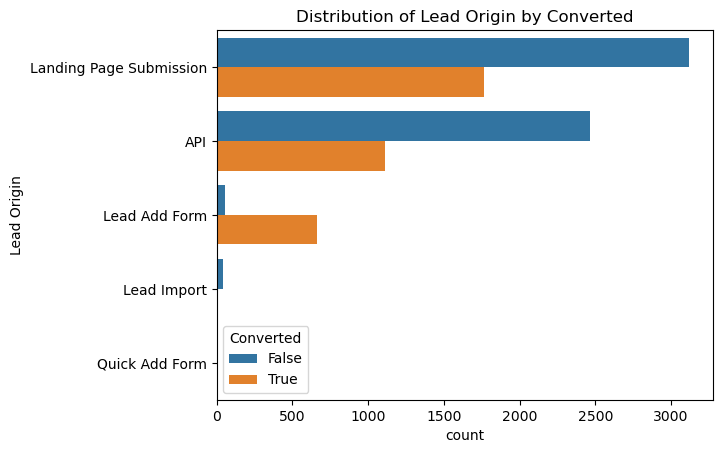

In [46]:
#Plot distribution of Lead Origin by Converted (Distribusi plot Asal Timbal berdasarkan Konversi)
count_by_converted('Lead Origin')

**Observations**
* Significantly more leads convert when they originate from the "Lead Add Form".
* The lead conversion rate appears slighly higher among leads originating from "Landing Page Submission" than from "API".

**Pengamatan**
* Secara signifikan lebih banyak prospek yang berkonversi bila berasal dari "Formulir Tambah Prospek".
* Tingkat konversi prospek tampak sedikit lebih tinggi di antara prospek yang berasal dari "Pengiriman Laman Landas" dibandingkan dari "API".

#### Univariate Analysis - Lead Source (Analisis Univariat - Sumber Utama)

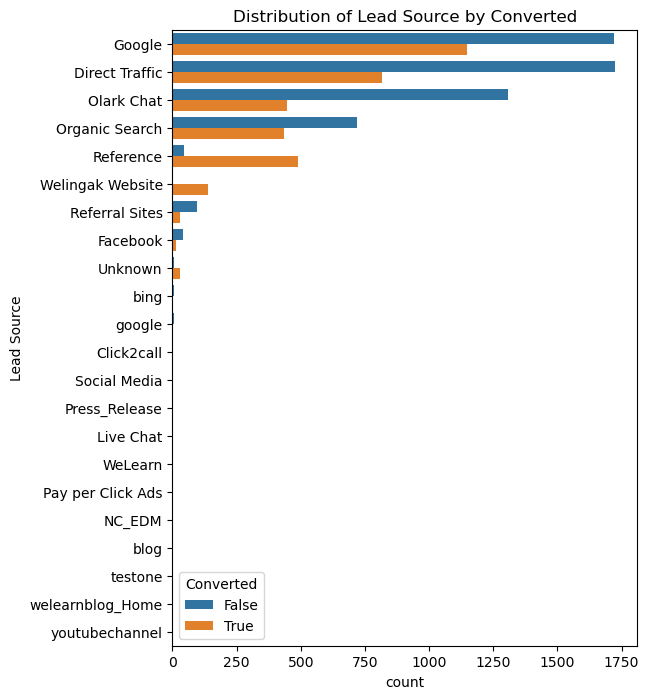

In [47]:
#Plot distribution of Lead Source by Converted (Distribusi plot Sumber Prospek berdasarkan Konversi)
plt.figure(figsize=(6, 8))
count_by_converted('Lead Source')

**Observations**
* Conversion rate appears to be highest for leads that come from the Wellingak Website or that are referred.
* **It is possible that increasing the number of leads that are referred and that come from the Willingak Website would increase the overall conversion rate.**
* While Google and Direct Traffic are the source for a similar number of leads, the conversion rate appears higher among leads that come from Google.
* Fewer leads have Organic Search as a source than Google, but leads coming from both these sources appear to have a similar conversion rate.

**Pengamatan**
* Tingkat konversi tampaknya paling tinggi untuk prospek yang berasal dari Situs Web Wellingak atau yang dirujuk.
* **Ada kemungkinan bahwa meningkatkan jumlah prospek yang dirujuk dan berasal dari Situs Willingak akan meningkatkan tingkat konversi secara keseluruhan.**
* Meskipun Google dan Lalu Lintas Langsung merupakan sumber dari jumlah prospek yang sama, tingkat konversi tampak lebih tinggi di antara prospek yang berasal dari Google.
* Lebih sedikit prospek yang memiliki Penelusuran Organik sebagai sumbernya dibandingkan Google, namun prospek yang berasal dari kedua sumber ini tampaknya memiliki rasio konversi yang serupa.

#### Univariate Analysis - Do Not Call (Analisis Univariat - Jangan Panggil)

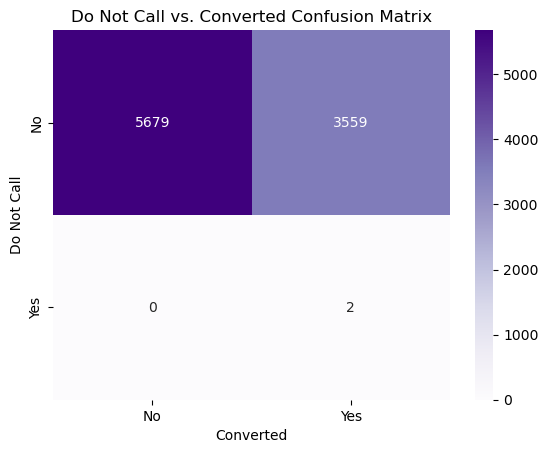

In [48]:
#Plot confusion matrix of Do Not Call against Converted (Matriks kebingungan plot Do Not Call versus Converted)
confusionmatrix_by_converted('Do Not Call')

**Observations**
* The vast majority of leads indicate "No" under Do Not Call, suggesting that the sales team is free to contact them by phone.
* The conversion rate among leads that indicate "No" under Do Not Call is 38.52%.
* While very few leads have a "Yes" under Do Not Call, the conversion rate among these appears to be 100%.

**Pengamatan**
* Sebagian besar prospek menunjukkan "Tidak" di bawah Jangan Panggil, yang menunjukkan bahwa tim penjualan bebas menghubungi mereka melalui telepon.
* Tingkat konversi di antara prospek yang menunjukkan "Tidak" di bawah Jangan Panggil adalah 38,52%.
* Meskipun sangat sedikit prospek yang memiliki jawaban "Ya" di bawah Jangan Panggil, tingkat konversi di antara prospek tersebut tampaknya 100%.

#### Univariate Analysis - Do Not Email (Analisis Univariat - Jangan Kirim Email)

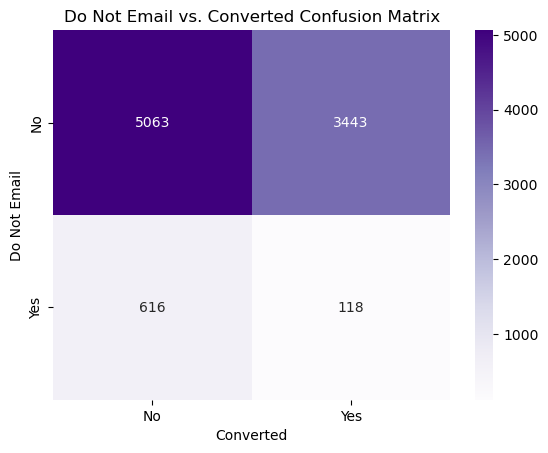

In [49]:
#Plot confusion matrix of Do Not Email against Converted (Matriks kebingungan plot Jangan Email versus Dikonversi)
confusionmatrix_by_converted('Do Not Email')

**Observations**
* Here again, the vast majority of leads indicate "No" under Do Not Email, suggesting that the sales team is free to contact them by email.
* The conversion rate among leads that indicate "No" under Do Not Call is 40.47%.
* Very few leads have a "Yes" under Do Not Call (7.94%). The conversion rate among these is to be 16.07%, more than half the conversion rate of leads that are open to receiving emails.

**Pengamatan**
* Di sini sekali lagi, sebagian besar prospek menunjukkan "Tidak" di bawah Jangan Email, yang menunjukkan bahwa tim penjualan bebas menghubungi mereka melalui email.
* Tingkat konversi di antara prospek yang menunjukkan "Tidak" di bawah Jangan Panggil adalah 40,47%.
* Sangat sedikit prospek yang memiliki jawaban "Ya" di bagian Jangan Panggil (7,94%). Tingkat konversi di antaranya adalah 16,07%, lebih dari setengah tingkat konversi prospek yang terbuka untuk menerima email.

#### Univariate Analysis - TotalVisits (Analisis Univariat - Total Kunjungan)

In [50]:
#Get descriptive statistics on TotalVisits by Converted (Dapatkan statistik deskriptif tentang Total Kunjungan berdasarkan Konversi)
stats_TV = pd.DataFrame(
    {'TotalVisits_Overall':dls['TotalVisits'].describe(),
    'TotalVisits_Converted':dls[dls['Converted']==True]['TotalVisits'].describe(),
    'TotalVisits_NotConverted':dls[dls['Converted']==False]['TotalVisits'].describe()})
stats_TV

,TotalVisits_Overall,TotalVisits_Converted,TotalVisits_NotConverted
count,9240.000000,3561.000000,5679.000000
mean,3.438636,3.615838,3.327522
std,4.819024,5.486307,4.345521
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,3.000000,3.000000,3.000000
75%,5.000000,5.000000,4.000000
max,251.000000,251.000000,141.000000


**Observations**
* On average, leads that convert appear to visit the website slightly more than leads that do not convert

**Pengamatan**
* Rata-rata, prospek yang melakukan konversi tampaknya mengunjungi situs web sedikit lebih banyak dibandingkan prospek yang tidak melakukan konversi

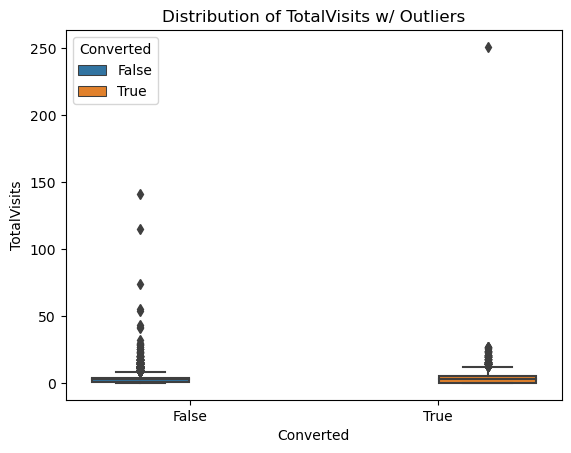

In [51]:
#Plot boxplots for distribution of TotalVisits by Converted (Plot plot kotak untuk distribusi Total Kunjungan berdasarkan Konversi)
sns.boxplot(y='TotalVisits', data=dls, x='Converted', hue='Converted')
plt.title("Distribution of TotalVisits w/ Outliers")
plt.show()

This distribution is difficult to visualize given the number of outliers. To better visualize the distribution of Total visits, we can produce the same plot by removing leads with TotalVisits > 50.

Distribusi ini sulit untuk divisualisasikan mengingat banyaknya outlier. Untuk memvisualisasikan distribusi Total kunjungan dengan lebih baik, kita dapat membuat plot yang sama dengan menghapus prospek dengan Total Kunjungan > 50.

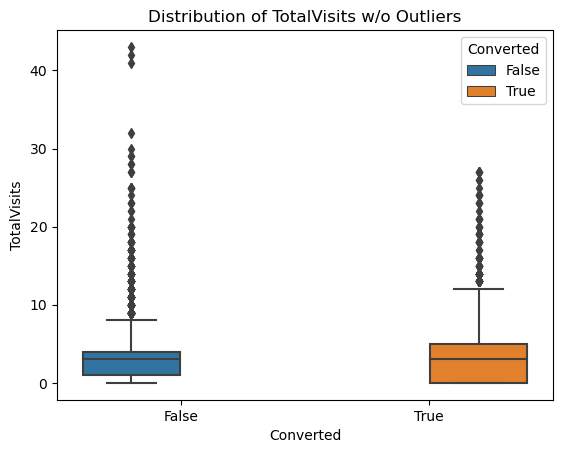

In [52]:
#Remove outliers (TotalVisits > 50) and plot boxplots for distribution of TotalVisits by Converted (Hapus outlier (Total Kunjungan > 50) dan buat plot kotak untuk distribusi Total Kunjungan berdasarkan Orang yang Berkonversi)
sns.boxplot(y='TotalVisits', data=dls[dls['TotalVisits']<=50], x='Converted', hue='Converted')
plt.title("Distribution of TotalVisits w/o Outliers")
plt.show()

**Observations**
* In addition to visiting the website more often, leads that convert appear to show a higher spread and IQR than leads that do not convert.

**Pengamatan**
* Selain lebih sering mengunjungi situs web, prospek yang melakukan konversi tampaknya menunjukkan spread dan IQR yang lebih tinggi dibandingkan prospek yang tidak melakukan konversi.

#### Univariate Analysis - Total Time Spent on Website (Analisis Univariat - Total Waktu yang Dihabiskan di Situs Web)

In [53]:
#Get descriptive statistics on Total Time Spent on Website by Converted (Dapatkan statistik deskriptif tentang Total Waktu yang Dihabiskan di Situs Web berdasarkan Konversi)
stats_TT = pd.DataFrame(
    {'TotalTime_Overall':dls['Total Time Spent on Website'].describe(),
    'TotalTime_Converted':dls[dls['Converted']==True]['Total Time Spent on Website'].describe(),
    'TotalTime_NotConverted':dls[dls['Converted']==False]['Total Time Spent on Website'].describe()})
stats_TT

,TotalTime_Overall,TotalTime_Converted,TotalTime_NotConverted
count,9240.000000,3561.000000,5679.000000
mean,487.698268,738.546757,330.404473
std,548.021466,615.656010,432.231915
min,0.000000,0.000000,0.000000
25%,12.000000,0.000000,16.000000
50%,248.000000,832.000000,179.000000
75%,936.000000,1268.000000,393.000000
max,2272.000000,2253.000000,2272.000000


**Observations**
* On average, leads that convert appear to spent more than double the time that leads that do not convert on the website.

**Pengamatan**
* Rata-rata, prospek yang melakukan konversi tampaknya menghabiskan lebih dari dua kali lipat waktu dibandingkan prospek yang tidak melakukan konversi di situs web.

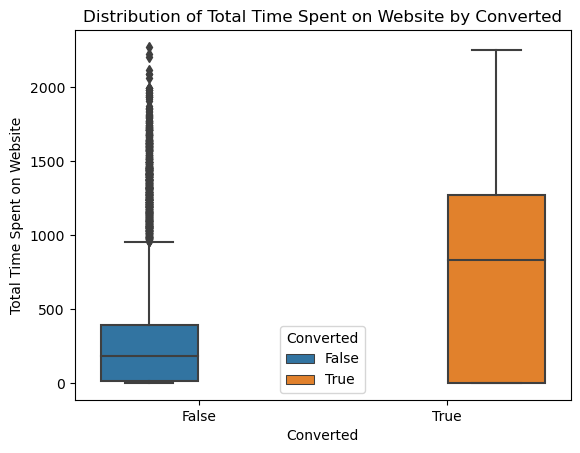

In [54]:
#Plot boxplots for distribution of Total Time Spent on Website by Converted (Plot boxplot untuk distribusi Total Waktu yang Dihabiskan di Situs Web berdasarkan Konversi)
sns.boxplot(y='Total Time Spent on Website', data=dls, x='Converted', hue='Converted')
plt.title("Distribution of Total Time Spent on Website by Converted")
plt.show()

**Observations**
* The IQR of Total Time Spent on Website for leads that convert is much higher than for leads that do not convert.
* **It is possible that driving leads to spend more time on the website would increase the overall conversion rate.**

**Pengamatan**
* IQR Total Waktu yang Dihabiskan di Situs Web untuk prospek yang berkonversi jauh lebih tinggi dibandingkan prospek yang tidak berkonversi.
* **Ada kemungkinan bahwa mendorong prospek untuk menghabiskan lebih banyak waktu di situs web akan meningkatkan rasio konversi secara keseluruhan.**

#### Univariate Analysis - Page Views Per Visit (Analisis Univariat - Tampilan Halaman Per Kunjungan)

In [55]:
#Get descriptive statistics for Page Views Per Visit by Converted (Dapatkan statistik deskriptif untuk Tampilan Halaman Per Kunjungan berdasarkan Konversi)
stats_PV = pd.DataFrame(
    {'TotalTime_Overall':dls['Page Views Per Visit'].describe(),
    'TotalTime_Converted':dls[dls['Converted']==True]['Page Views Per Visit'].describe(),
    'TotalTime_NotConverted':dls[dls['Converted']==False]['Page Views Per Visit'].describe()})
stats_PV

,TotalTime_Overall,TotalTime_Converted,TotalTime_NotConverted
count,9240.000000,3561.000000,5679.000000
mean,2.357440,2.343707,2.366052
std,2.145781,2.109825,2.168163
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.330000,3.000000
max,55.000000,24.000000,55.000000


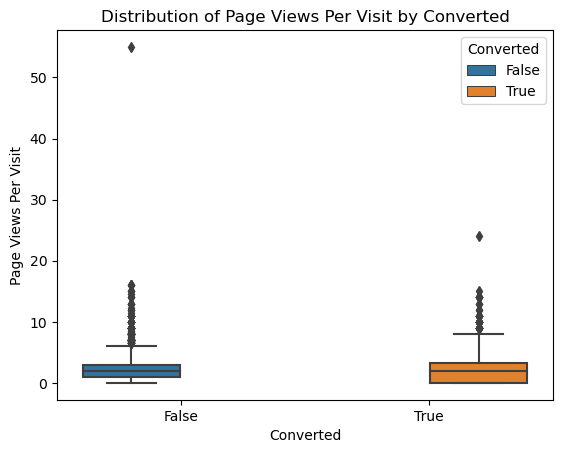

In [56]:
#Plot boxplots for distribution of Page Views Per Visit by Converted (Plot boxplot untuk distribusi Tampilan Halaman Per Kunjungan berdasarkan Konversi)
sns.boxplot(y='Page Views Per Visit', data=dls, x='Converted', hue='Converted')
plt.title("Distribution of Page Views Per Visit by Converted")
plt.show()

**Observations**
* All leads appear to view a similar number of pages per visit on average, regardless of conversion status.
* However, the IQR of Page Views Per Visit is larger for leads that convert, in part because a large portion of leads that convert have an average of 0 page views per visit.
* The outlier that viewed 55 pages per visit on average may not be a lead, but in fact a competitor or an staff member consulting the website.

**Pengamatan**
* Semua prospek tampaknya melihat rata-rata jumlah laman per kunjungan yang sama, apa pun status konversinya.
* Namun, IQR Tampilan Halaman Per Kunjungan lebih besar untuk prospek yang berkonversi, sebagian karena sebagian besar prospek yang berkonversi memiliki rata-rata 0 tampilan halaman per kunjungan.
* Pencilan yang melihat rata-rata 55 halaman per kunjungan mungkin bukan merupakan prospek, namun sebenarnya merupakan pesaing atau anggota staf yang berkonsultasi dengan situs web.

#### Univariate Analysis - Last Activity (Analisis Univariat - Aktivitas Terakhir)

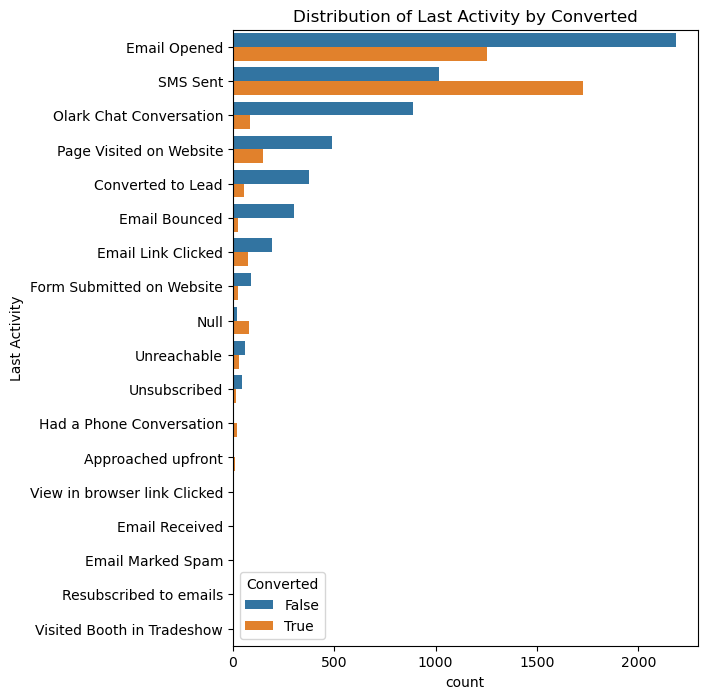

In [57]:
#Plot distribution of Last Activity by Converted (Distribusi plot Aktivitas Terakhir berdasarkan Konversi)
plt.figure(figsize=(6,8))
count_by_converted('Last Activity')

**Observations**
* The Last Activity with he highest conversion rate is by far SMS Sent.
* **Further investigation is required to determine whether this is a result of th effectiveness of this activity or simply the stage at which it takes place in the lead nurturing process.**

**Pengamatan**
* Aktivitas Terakhir dengan tingkat konversi tertinggi sejauh ini adalah SMS Terkirim.
* **Penyelidikan lebih lanjut diperlukan untuk menentukan apakah hal ini merupakan hasil dari efektivitas kegiatan ini atau hanya tahap di mana kegiatan ini berlangsung dalam proses pengasuhan pemimpin.**

#### Univariate Analysis - Search (Analisis Univariat - Pencarian)

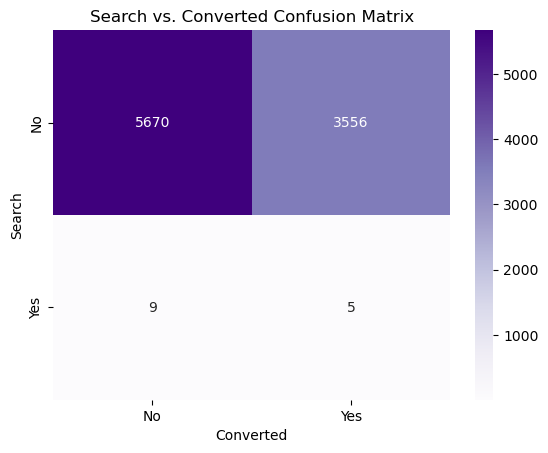

In [58]:
#Plot distribution of Search by Converted (Distribusi plot Pencarian berdasarkan Konversi)
confusionmatrix_by_converted('Search')

**Observations**
* Very few leads have seen an ad during a web search

**Pengamatan**
* Sangat sedikit prospek yang melihat iklan selama penelusuran web

#### Univariate Analysis - Magazine (Analisis Univariat - Majalah)

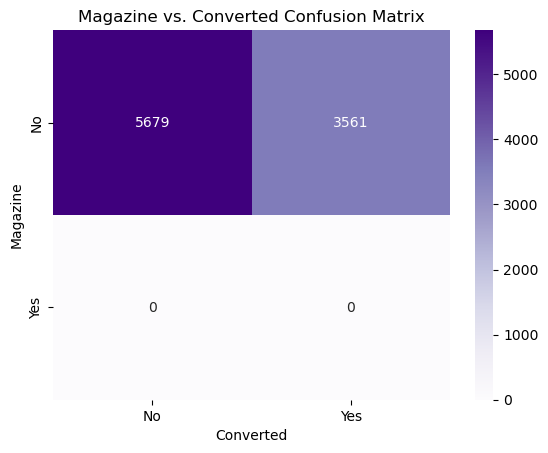

In [59]:
#Plot distribution of Magazine by Converted (Plot distribusi Majalah berdasarkan Converted)
confusionmatrix_by_converted('Magazine')

**Observations**
* No leads saw an ad in a magazine.
* **Madugital may want to reconsider investing in this marketing channel.**

**Pengamatan**
* Tidak ada prospek yang melihat iklan di majalah.
* **Madugital mungkin ingin mempertimbangkan kembali investasi di saluran pemasaran ini.**

#### Univariate Analysis - Newspaper Article (Analisis Univariat - Artikel Surat Kabar)

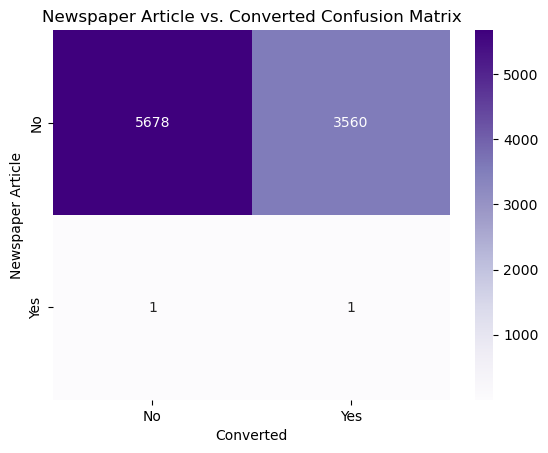

In [60]:
#Plot distribution of Newspaper Article by Converted
confusionmatrix_by_converted('Newspaper Article')

**Observations**
* Very few leads saw an ad in a newspaper article.
* **Madugital may want to reconsider investing in this marketing channel as well.**

**Pengamatan**
* Sangat sedikit prospek yang melihat iklan di artikel surat kabar.
* **Madugital mungkin ingin mempertimbangkan kembali berinvestasi di saluran pemasaran ini juga.**

#### Univariate Analysis - Madugital Telegram (Analisis Univariat - Madugital Telegram)

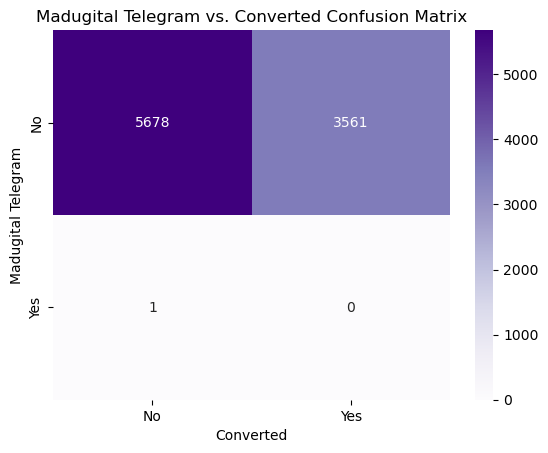

In [61]:
#Plot distribution of Madugital Telegram by Converted (Plot distribusi Telegram Madugital berdasarkan Konversi)
confusionmatrix_by_converted('Madugital Telegram')

**Observations**
* Very few leads saw an ad in an Madugital Telegram.

**Pengamatan**
* Sangat sedikit prospek yang melihat iklan di Madugital Telegram.

#### Univariate Analysis - Newspaper (Analisis Univariat - Surat Kabar)

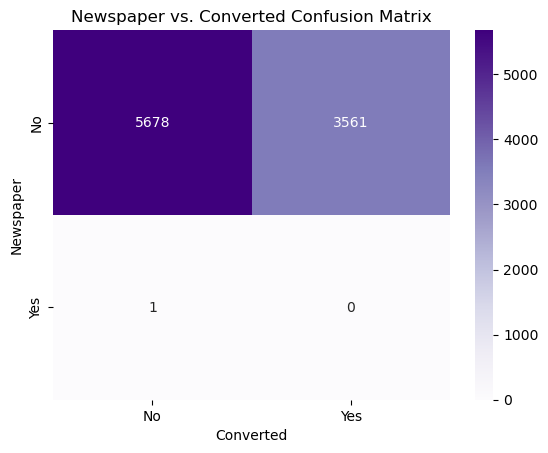

In [62]:
#Plot distribution of Newspaper by Converted (Plot distribusi Surat Kabar menurut orang yang bertobat)
confusionmatrix_by_converted('Newspaper')

**Observations**
* Very few leads saw an ad in a newspaper.
* **Madugital may want to reconsider investing in this marketing channel as well.**

**Pengamatan**
* Sangat sedikit prospek yang melihat iklan di surat kabar.
* **Madugital mungkin ingin mempertimbangkan kembali berinvestasi di saluran pemasaran ini juga.**

#### Univariate Analysis - Digital Advertisement (Analisis Univariat - Iklan Digital)

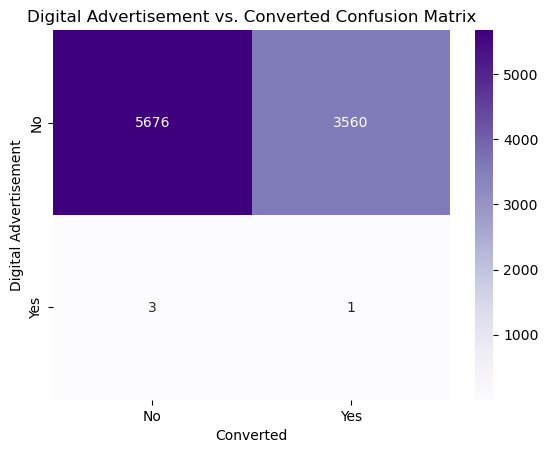

In [63]:
#Plot distribution of Digital Advertisement by Converted (Distribusi Plot Iklan Digital berdasarkan Konversi)
confusionmatrix_by_converted('Digital Advertisement')

**Observations**
* Very few leads saw an ad in a Digital Advertisement.

**Pengamatan**
* Sangat sedikit prospek yang melihat iklan di Iklan Digital.

#### Univariate Analysis - Through Recommendations (Analisis Univariat - Melalui Rekomendasi)

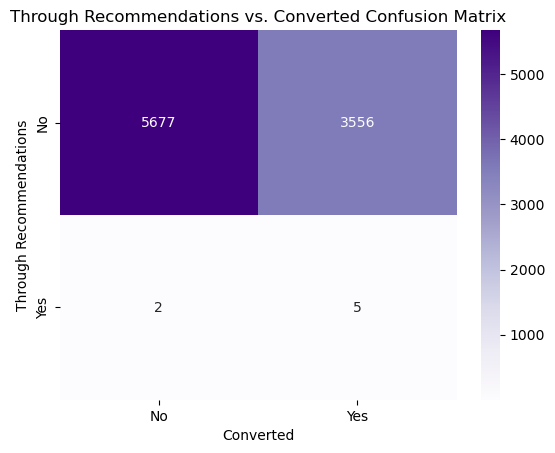

In [64]:
#Plot distribution of Through Recommendations by Converted (Distribusi plot Melalui Rekomendasi oleh Berkonversi)
confusionmatrix_by_converted('Through Recommendations')

**Observations**
* Very few leads appear to have come in through a recommendation.
* This is strange, as more than 500 leads have "Reference" as a Lead Source. Are recommendation and reference different? If so, in what way?

**Pengamatan**
* Tampaknya sangat sedikit prospek yang masuk melalui rekomendasi.
* Ini aneh, karena lebih dari 500 lead memiliki "Referensi" sebagai Lead Source. Apakah rekomendasi dan referensi berbeda? Jika ya, dengan cara apa?

#### Univariate Analysis - Receive More Updates About Our Products (Analisis Univariat - Dapatkan Pembaruan Lebih Lanjut Tentang Produk Kami)

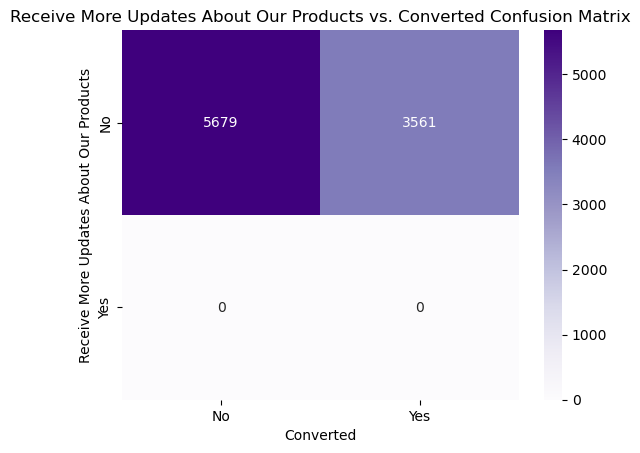

In [65]:
#Plot distribution of Receive More Updates About Our Products by Converted (Distribusi plot Menerima Lebih Banyak Pembaruan Tentang Produk Kami berdasarkan Konversi)
confusionmatrix_by_converted('Receive More Updates About Our Products')

**Observations**
* Not a single lead indicated that they wanted to receive more updates on Madugital Product. 
* If this is not a data error, it should be a point of concern for the organization.

**Pengamatan**
* Tidak ada satu pun prospek yang mengindikasikan bahwa mereka ingin menerima lebih banyak pembaruan tentang Produk Madugital.
* Jika ini bukan kesalahan data, hal ini harus menjadi perhatian organisasi.

#### Univariate Analysis - Update me on Supply Chain Content (Analisis Univariat - Perbarui saya tentang Konten Rantai Pasokan)

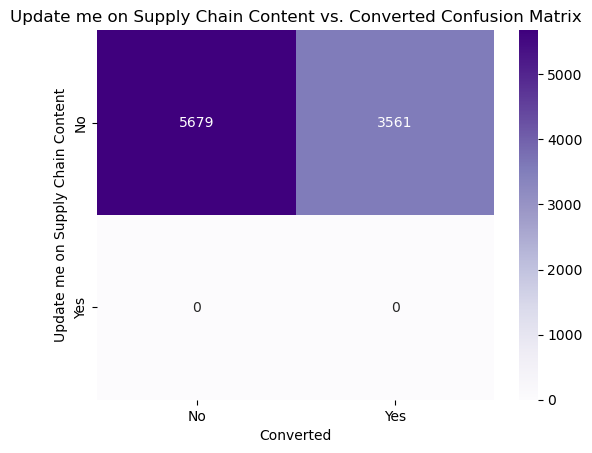

In [66]:
#Plot distribution of Update me on Supply Chain Content by Converted (Plot distribusi Perbarui saya tentang Konten Rantai Pasokan berdasarkan Konversi)
confusionmatrix_by_converted('Update me on Supply Chain Content')

**Observations**
* Not a single lead indicated that they wanted to receive updates on supply chain content.
* Sending out this kind of content to leads is evidently not of interest to them.

**Pengamatan**
* Tidak ada satu pun prospek yang mengindikasikan bahwa mereka ingin menerima pembaruan tentang konten rantai pasokan.
* Mengirimkan konten semacam ini ke prospek jelas tidak menarik bagi mereka.

#### Univariate Analysis - Get updates on DM Content (Analisis Univariat - Dapatkan pembaruan tentang Konten DM)

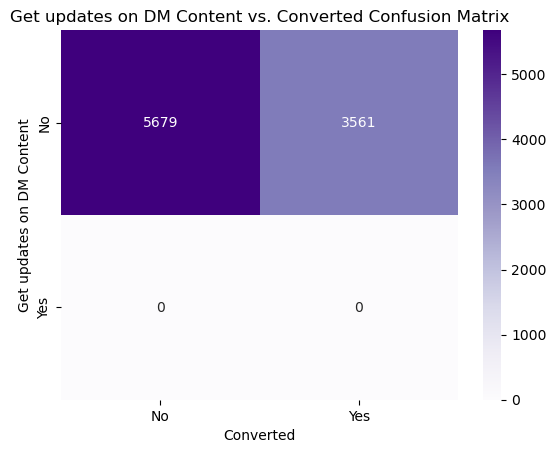

In [67]:
#Plot distribution of Get updates on DM Content by Converted (Distribusi plot Dapatkan pembaruan pada Konten DM berdasarkan Konversi)
confusionmatrix_by_converted('Get updates on DM Content')

**Observations**
* Not a single lead indicated that they wanted to receive updates on DM content.
* Sending out this kind of content to leads is evidently not of interest to them.

**Pengamatan**
* Tidak ada satu pun prospek yang menyatakan ingin menerima pembaruan konten DM.
* Mengirimkan konten semacam ini ke prospek jelas tidak menarik bagi mereka.

#### Univariate Analysis - I agree to pay the amount through cheque (Analisis Univariat - Saya setuju untuk membayar jumlah tersebut melalui cek)

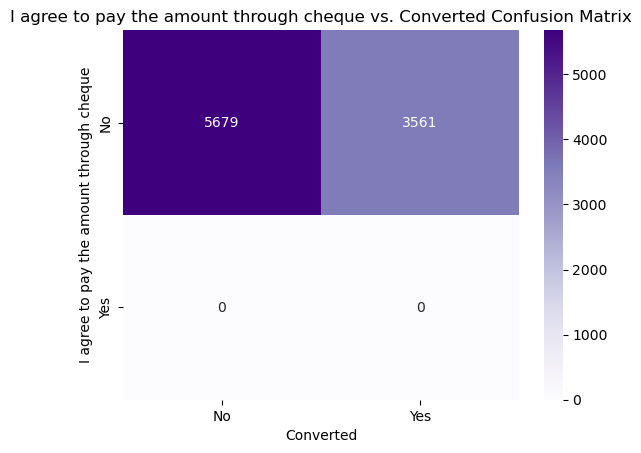

In [68]:
#Plot distribution of I agree to pay the amount through cheque by Converted (Distribusi plot Saya setuju untuk membayar jumlah tersebut melalui cek dengan Konversi)
confusionmatrix_by_converted('I agree to pay the amount through cheque')

**Observations**
* Not a single lead indicated that they wanted to pay by cheque.
* This payment method is evidently not of interest to leads.

**Pengamatan**
* Tidak ada satu pun petunjuk yang menunjukkan bahwa mereka ingin membayar dengan cek.
* Metode pembayaran ini jelas tidak menarik bagi prospek.

#### Univariate Analysis - A free copy of Mastering The Interview (Analisis Univariat - Salinan gratis Mastering The Interview)

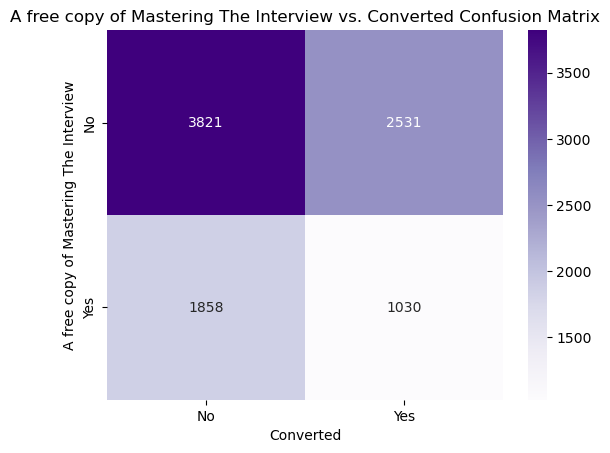

In [69]:
#Plot distribution of A free copy of Mastering The Interview by Converted (Distribusi plot salinan gratis Mastering The Interview oleh Converted)
confusionmatrix_by_converted('A free copy of Mastering The Interview')

In [70]:
#Compute conversion rate among leads who did and didn't want to receive a free copy of Mastering The Interview (menghitung tingkat konversi di antara prospek yang bersedia dan tidak ingin menerima salinan gratis Mastering The Interview)
print('The overall lead conversion rate is ', dls['Converted'].mean())
print('The lead conversion rate among those who received a free copy of Mastering The Interview is ',dls[dls['A free copy of Mastering The Interview']==True]['Converted'].mean())
print('The lead conversion rate among those who DID NOT receive a free copy of Mastering The Interview is ',dls[dls['A free copy of Mastering The Interview']==False]['Converted'].mean())

The overall lead conversion rate is  0.3853896103896104
The lead conversion rate among those who received a free copy of Mastering The Interview is  0.35664819944598336
The lead conversion rate among those who DID NOT receive a free copy of Mastering The Interview is  0.3984571788413098


**Observations**
* Nearly 1/3 leads wanted to receive a free copy of Mastering The Interview
* Interestingly, leads who received a free copy of Mastering The Interview had a lower conversion rate!
* **Could this be because once leads receive a copy for Mastering The Interview, they don't feel the need for Madugital Product?**

**Pengamatan**
* Hampir 1/3 prospek ingin menerima salinan gratis Mastering The Interview
* Menariknya, prospek yang menerima salinan gratis Mastering The Interview memiliki tingkat konversi yang lebih rendah!
* **Mungkinkah ini karena setelah prospek menerima salinan Mastering The Interview, mereka tidak merasa memerlukan Produk Madugital?**

#### Univariate Analysis - Last Notable Activity (Analisis Univariat - Aktivitas Penting Terakhir)

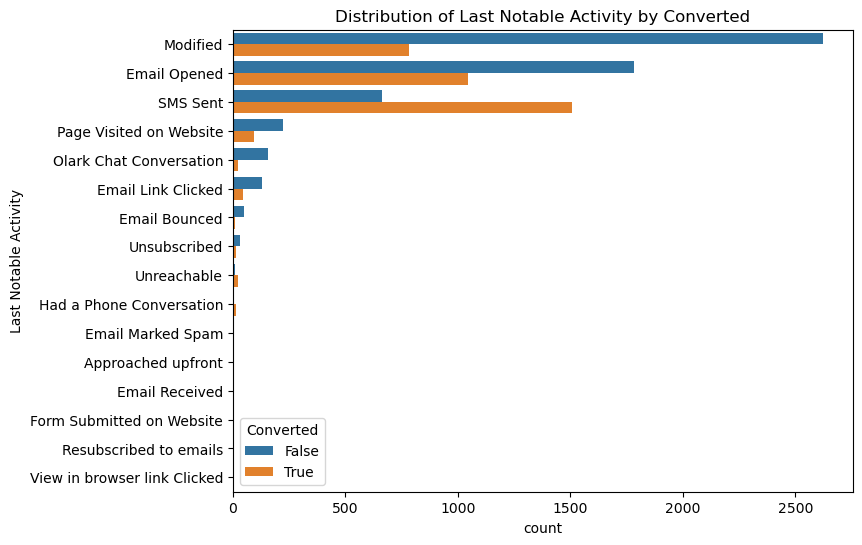

In [71]:
#Plot distribution of Last Notable Activity by Converted (Distribusi plot Aktivitas Penting Terakhir berdasarkan Konversi)
plt.figure(figsize=(8,6))
count_by_converted('Last Notable Activity')

**Observations**

* As seen under Last Activity, SMS Sent is the Last Notable Activity with the highest conversion rate.

**Pengamatan**

* Seperti yang terlihat pada Aktivitas Terakhir, SMS Terkirim adalah Aktivitas Penting Terakhir dengan tingkat konversi tertinggi.

# Model Development (Pengembangan Model)

#### Data Splitting

We identify model predictors (all remaining dataset features except Lead Number) and the target variable. Categorical variables codified using One-Hot Encoding.

Then, we split our data into a training and a testing set (70% of the data will be used for the training set, while the remaining 30% will be used in the test set). 

#### Pemisahan Data

Kami mengidentifikasi prediktor model (semua fitur kumpulan data yang tersisa kecuali Nomor Prospek) dan variabel target. Variabel kategori dikodifikasi menggunakan One-Hot Encoding.

Kemudian, kami membagi data menjadi set pelatihan dan set pengujian (70% data akan digunakan untuk set pelatihan, sedangkan 30% sisanya akan digunakan dalam set pengujian).

In [72]:
#Split data into training and testing set (Pisahkan data menjadi set pelatihan dan pengujian)
drop_cols = ['Lead Number','Converted']
X = pd.get_dummies(dls.drop(columns=drop_cols, axis=1))
y = dls['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

#### Feature Scaling

Most classification models perform better after feature scaling. This is because numeric predictors often have different centers and ranges. For this dataset, numeric predictors include the following:

* TotalVisits
* Total Time Spent on Website
* Page Views per Visit

Since none of these features follow a normal distribution, standardization using MinMaxScaler is the prefered feature scaling method.

#### Penskalaan Fitur

Sebagian besar model klasifikasi berperforma lebih baik setelah penskalaan fitur. Hal ini karena prediktor numerik sering kali memiliki pusat dan rentang yang berbeda. Untuk kumpulan data ini, prediktor numerik mencakup hal berikut:

* Total Kunjungan
* Total Waktu yang Dihabiskan di Situs Web
* Tampilan Halaman per Kunjungan

Karena tidak satupun fitur ini mengikuti distribusi normal, standarisasi menggunakan MinMaxScaler adalah metode penskalaan fitur yang lebih disukai.

In [73]:
#Scale the numeric features using MinMaxScaler (Skalakan fitur numerik menggunakan MinMaxScaler)
scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

#### Model Building

Next, we build two models and compare their performance - a Logistic Regression model and a Random Forest Ensemble model.

Both models will be assessed on their AUC value. AUC (Area Under Curve) is an especially useful performance metric for models whose output are a probability. In short, it indicates the percentage of the time a model correctly assigns a higher probability to a lead that will convert when compared to a lead that will not convert. As such, it is valuable in determining the performance of a lead scoring model.

In the Logistic Regression model, the 'liblinear' optimization algorithm is used since it performs well on relatively small datasets. GridSearchCV is used to find the algorithm's optimal regularization strength and penalty norm to maximize model AUC.

#### Pembuatan Model

Selanjutnya, kami membuat dua model dan membandingkan kinerjanya - model Regresi Logistik dan model Random Forest Ensemble.

Kedua model akan dinilai nilai AUC-nya. AUC (Area Under Curve) adalah metrik kinerja yang sangat berguna untuk model yang keluarannya berupa probabilitas. Singkatnya, ini menunjukkan persentase waktu model menetapkan probabilitas yang lebih tinggi dengan benar pada prospek yang akan berkonversi jika dibandingkan dengan prospek yang tidak akan berkonversi. Oleh karena itu, hal ini sangat berharga dalam menentukan kinerja model penilaian prospek.

Dalam model Regresi Logistik, algoritma optimasi 'liblinear' digunakan karena kinerjanya baik pada kumpulan data yang relatif kecil. GridSearchCV digunakan untuk menemukan kekuatan regularisasi optimal algoritma dan norma penalti untuk memaksimalkan AUC model.

In [74]:
#Fit logistic model (Cocok dengan model logistik)
parameters_lr = {'penalty': ['l1', 'l2'], 'C' : np.logspace(-3,3,5,base=10.0)}
lr = LogisticRegression(solver='liblinear', random_state=123)

lr_cv = GridSearchCV(lr, param_grid=parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train, y_train)

print(lr_cv.best_params_)
lr_best = lr_cv.best_estimator_

{'C': 1.0, 'penalty': 'l1'}


In [75]:
#Fit random forest classifier with hyperparameter tuning (Cocokkan pengklasifikasi hutan acak dengan penyetelan hyperparameter)
parameters_rf = {'max_depth':np.arange(6,30,2),'min_samples_leaf':np.arange(100,500,50)}
rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid=parameters_rf, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
rf_best = rf_cv.best_estimator_

{'max_depth': 22, 'min_samples_leaf': 100}


#### Model Comparison

As outlined previously, AUC is the performance metric by which these models will be compared. We also plot their ROC curves to assess for any major differences in shape.

#### Perbandingan Model

Seperti diuraikan sebelumnya, AUC adalah metrik performa yang akan digunakan untuk membandingkan model-model ini. Kami juga memplot kurva ROC untuk menilai perbedaan besar dalam bentuk.

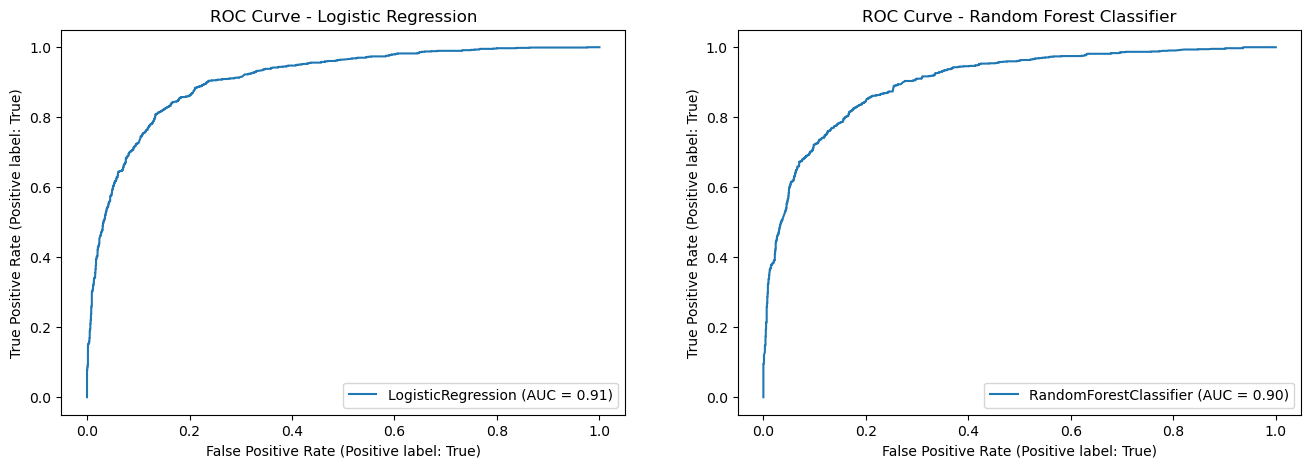

In [76]:
#Plot ROC curve & AUC (Plot kurva ROC dan AUC)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
models = {'Logistic Regression':lr_best, 'Random Forest Classifier':rf_best}

for n,m in models.items():
    RocCurveDisplay.from_estimator(m, X_test, y_test, ax=axes[list(models.keys()).index(n)])
    plt.sca(axes[list(models.keys()).index(n)])
    plt.title('ROC Curve - ' + n)

At first glance, the Logistic Regression model appears to perform better. Both models have similar ROC curves, but the Logistic Regression model shows a slightly higher AUC value.

To assess each model's fit, we can compare the AUC score on the training & test sets.

Sekilas, model Regresi Logistik tampak memiliki kinerja yang lebih baik. Kedua model memiliki kurva ROC yang serupa, namun model Regresi Logistik menunjukkan nilai AUC yang sedikit lebih tinggi.

Untuk menilai kesesuaian setiap model, kita dapat membandingkan skor AUC pada set pelatihan & pengujian.

In [77]:
#Compute AUC score on training & test data for the Logistic Regression model (Hitung skor AUC pada data pelatihan & pengujian untuk model Regresi Logistik)
print('Logistic Regression - AUC (training set):', roc_auc_score(y_train, lr_best.predict_proba(X_train)[:,1]))
print('Logistic Regression - AUC (test set):', roc_auc_score(y_test, lr_best.predict_proba(X_test)[:,1]))

Logistic Regression - AUC (training set): 0.9216770983912187
Logistic Regression - AUC (test set): 0.9093895065147439


In [78]:
#Compute AUC score on training & test data for the Random Forest Classifier model (Hitung skor AUC pada data pelatihan & pengujian untuk model Random Forest Classifier)
print('Random Forest Classifier - AUC (training set):', roc_auc_score(y_train, rf_best.predict_proba(X_train)[:,1]))
print('Random Forest Classifier - AUC (test set):', roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1]))

Random Forest Classifier - AUC (training set): 0.9128687873214814
Random Forest Classifier - AUC (test set): 0.9021252593589


By comparing these AUC scores, we see that neither model overfits the data, as the AUC score on the test sets are only slightly lower. We can also confirm that the Logisitc Regression model is the one that achieves the highest AUC on the test set of 0.9093.

We can further compare how each of these models separate the data by comparing the distribution of the lead scores they assign for converted and non-converted leads.

Dengan membandingkan skor AUC ini, kami melihat bahwa tidak ada model yang melebihi data, karena skor AUC pada set pengujian hanya sedikit lebih rendah. Kami juga dapat mengonfirmasi bahwa model Regresi Logisitc adalah model yang mencapai AUC tertinggi pada set pengujian sebesar 0,9093.

Kami selanjutnya dapat membandingkan bagaimana masing-masing model ini memisahkan data dengan membandingkan distribusi skor prospek yang mereka tetapkan untuk prospek yang berkonversi dan tidak berkonversi.

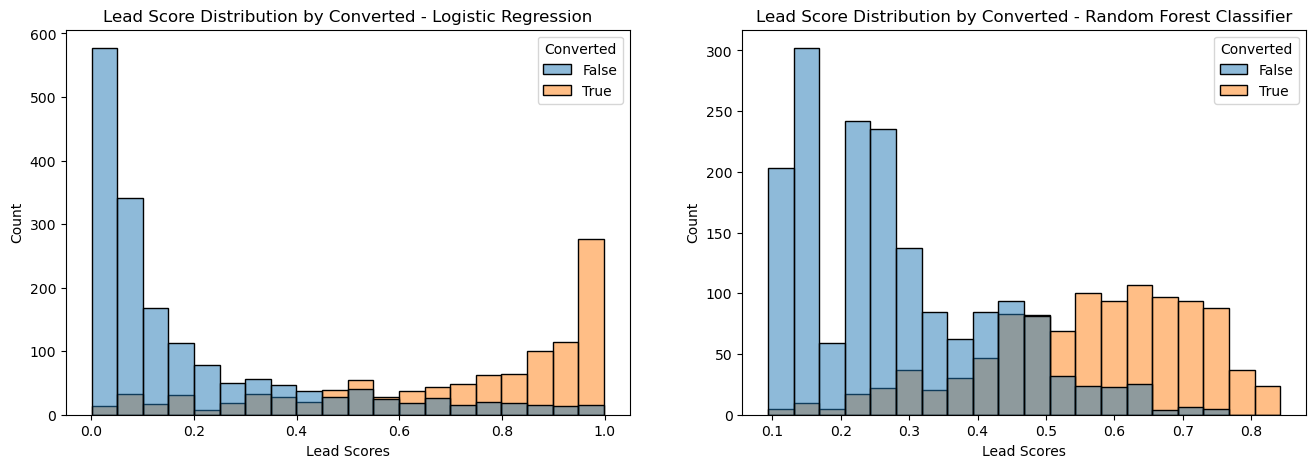

In [79]:
#Plot histogram of lead scores by Converted (Plot histogram skor prospek berdasarkan Konversi)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for n,m in models.items():
    sns.histplot(x=m.predict_proba(X_test)[:,1], hue=y_test, ax=axes[list(models.keys()).index(n)], bins=20)
    plt.sca(axes[list(models.keys()).index(n)])
    plt.title('Lead Score Distribution by Converted - ' + n)
    plt.xlabel('Lead Scores')

The above histograms appear to validate the higher AUC score shown by the Logistic Regression model. The lead scores appear to be more cleanly separated in the Logistic Regression histogram, with less overlap between the scores of converted and non-converted leads.

**As such, we can select the Logistic Regression model as our Lead Scoring Model of choice.**

Histogram di atas tampaknya memvalidasi skor AUC lebih tinggi yang ditunjukkan oleh model Regresi Logistik. Skor prospek tampak terpisah lebih rapi dalam histogram Regresi Logistik, dengan lebih sedikit tumpang tindih antara skor prospek yang berkonversi dan yang tidak berkonversi.

**Dengan demikian, kami dapat memilih model Regresi Logistik sebagai Model Penskoran Prospek pilihan kami.**

In [80]:
#Assign lr_best as the chosen lead scoring model & get model coefficients + intercept (Tetapkan lr_best sebagai model penilaian prospek yang dipilih & dapatkan koefisien model + intersep)
lead_score_model = lr_best

intercept = lead_score_model.intercept_

coefs = pd.concat([pd.DataFrame(X.columns, columns=['Predictor']),pd.DataFrame(np.transpose(lead_score_model.coef_), columns=['Coefficient'])], axis = 1)

#### Increasing Conversion Rate

The CEO of Madugital expressed he wanted to see lead conversion rate increase to around 80%. Using a lift chart, we can determine how many leads should be contacted to reach a conversion rate of 80% if we contact leads in order of highest to lowest lead score.

#### Meningkatkan Tingkat Konversi

CEO Madugital menyatakan dia ingin melihat tingkat konversi timbal meningkat menjadi sekitar 80%. Dengan menggunakan diagram peningkatan, kita dapat menentukan berapa banyak prospek yang harus dihubungi untuk mencapai tingkat konversi 80% jika kita menghubungi prospek dalam urutan skor prospek tertinggi hingga terendah.

In [81]:
from scikitplot.metrics import plot_lift_curve

Baseline conversion rate:  38.54 %
Lift equivalent to conversion rate of 80%:  2.08


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

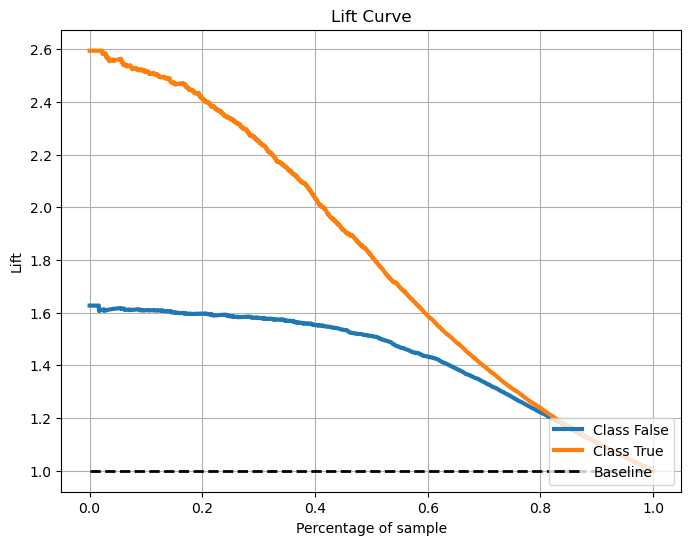

In [82]:
#Plot lift chart (Bagan peningkatan plot)
X_scaled = X.copy()
X_scaled[scale_cols] = scaler.transform(X_scaled[scale_cols])

baseline = y.mean()*100
target_lift = 80/baseline
print('Baseline conversion rate: ', round(baseline,2), '%')
print('Lift equivalent to conversion rate of 80%: ', round(target_lift,2))

plot_lift_curve(y,lead_score_model.predict_proba(X_scaled), figsize=(8,6))

To reach a conversion rate of 80%, the sales team must increase their conversion rate by a factor of 2.08. Assuming that our test set is a representative sample of future leads encountered by Madugital, the chart above indicates that by contacting the top 35% of leads by lead scores, the sales team can reach a conversion rate of 80%.

Untuk mencapai tingkat konversi 80%, tim penjualan harus meningkatkan tingkat konversi mereka sebesar 2,08 kali lipat. Dengan asumsi bahwa set pengujian kami adalah sampel representatif dari prospek masa depan yang ditemui oleh Madugital, bagan di atas menunjukkan bahwa dengan menghubungi 35% prospek teratas berdasarkan skor prospek, tim penjualan dapat mencapai tingkat konversi sebesar 80%.

# Conclusion (Kesimpulan)

In conclusion, the logistic regression model we developed proved to be a superior lead scoring model. In nearly 88% of cases, it correctly assigns a higher lead score to leads that will convert compared to a lead who will not convert. By using this lead scoring model, the sales team can increase their conversion rate to 80% by focussing on the top 30% of leads by lead score.

As a recommended next step for Madugital, it would be valuable to determine a minimum lead score for sales reps to bother contacting a lead. This can be done after the cost of having a sales rep contact a lead, as well as the value of a converted lead, has been determined. Using a profit matrix, the optimal threshold for classification to maximize profit can be identified.

Kesimpulannya, model regresi logistik yang kami kembangkan terbukti menjadi model penilaian prospek yang unggul. Dalam hampir 88% kasus, metode ini dengan tepat memberikan skor prospek yang lebih tinggi pada prospek yang akan melakukan konversi dibandingkan dengan prospek yang tidak akan melakukan konversi. Dengan menggunakan model penilaian prospek ini, tim penjualan dapat meningkatkan tingkat konversi mereka hingga 80% dengan berfokus pada 30% prospek teratas berdasarkan skor prospek.

Sebagai langkah berikutnya yang direkomendasikan untuk Madugital, akan sangat bermanfaat untuk menentukan skor prospek minimum agar perwakilan penjualan perlu repot menghubungi prospek. Hal ini dapat dilakukan setelah biaya untuk menghubungi perwakilan penjualan, serta nilai prospek yang dikonversi, telah ditentukan. Dengan menggunakan matriks keuntungan, ambang batas optimal klasifikasi untuk memaksimalkan keuntungan dapat diidentifikasi.